# Time Series Analysis


In [11]:
install.packages("vars")
library(vars)
library(tseries)
library(forecast)
#library(urca)
#library(mFilter)

Installing package into 'C:/Users/dalit/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependency 'strucchange'




package 'strucchange' successfully unpacked and MD5 sums checked
package 'vars' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dalit\AppData\Local\Temp\RtmpUxnga8\downloaded_packages


Warning message:
"package 'vars' was built under R version 4.0.3"
Loading required package: MASS

Loading required package: strucchange

Warning message:
"package 'strucchange' was built under R version 4.0.3"
Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: urca

Loading required package: lmtest

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [15]:
############################################################################
#####   Package mechkar                                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-01                                       ####
############################################################################

############################################################################
#####   DATA VISUALIZATION                                              ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2014-03-12                                       ####
############################################################################

###########  Functions   ##############################################

###################################################

exploreData <- function(data=data, y=NULL, rn=NULL, factorSize=10, dir=tempdir(), debug=FALSE, ...) {
  
  whatVarType <- function(var) {
    suppressWarnings(if (var=="integer" | var=="numeric") {
      return(1)
    } else if (var=="factor" | var=="character") {
      return(2)
    } else if (var=="Date" | "POSIXct" %in% var[[1]]) {
      return(3)
    } else {
      return(0)
    })
  }
  
  drawHistogram <- function(imgname=imgname, x=x) {
    d=stats::density(x, kernel = "gaussian",na.rm=TRUE)
    breakstar=(max(x,na.rm=TRUE) -min(x,na.rm=TRUE))/d$bw
    h=graphics::hist(x, breaks=breakstar)
    graphics::plot(h,main="",xlab=imgname)
    yfit<-seq(min(x,na.rm=TRUE),max(x,na.rm=TRUE),length=40)
    ffit<-stats::dnorm(yfit,mean=mean(x,na.rm=TRUE),sd=stats::sd(x,na.rm=TRUE))
    ffit <- ffit*diff(h$mids[1:2])*length(x)
    lines(yfit, ffit, col="blue", lwd=2)
  }
  
  drawFakeGraph <- function(imgname=imgname) {
    graphics::plot.window(xlim = c(0,0),ylim = c(0,0))
  }
  
  drawBars <- function(imgname=imgname, x=x) {
    graphics::plot(x)
  }
  
  drawGraphOne <- function(imgname=imgname, numVar=x, vartype=1) {
    if(vartype==1) {
      drawHistogram(imgname,numVar)
    } else if(vartype==2) {
      drawBars(imgname,numVar)
    } else {
      drawFakeGraph(imgname)
    }
  }
  
  getContinuousStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    me <- formatC(stats::median(x, na.rm=TRUE))
    q1 <- formatC(stats::quantile(x,1/4, na.rm=TRUE))
    q3 <- formatC(stats::quantile(x,3/4, na.rm=TRUE))
    mn <- formatC(min(x, na.rm=TRUE))
    mx <- formatC(max(x, na.rm=TRUE))
    html <- paste("<div class='Cell' style='align: top;'> <u>Data type</u>: Continuous <p> <u>Data length</u>: ",n ,"/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%)<p> <u>Mean</u>: ", formatC(ma), "\t <u>StdDev</u>: ", formatC(s), "<br><u>Median</u>: ",me,
                  "\t <u>IQR</u>: ", q1, "-", q3, "<br><u>Min</u>: ", mn, "\t <u>Max</u>: ", mx, "</div>")
    return(html)
  }
  
  getCategortyStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    l <- levels(x)
    s <- summary(x)
    htm <- "<ul>"
    if (length(l) < 5) {
      for (lv in l) {
        htm <- paste(htm, "<li><u>", lv, "</u>: ", s[[lv]], "</li>")
      }
      htm <- paste(htm,"</ul>")
    }
    html <- paste("<div class='Cell'> <u>Data type</u>: Categorical Data <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Number of levels</u>: ", length(l), "<br>", htm, "</div>")
    return(html)
  }
  
  getDatesStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    s <- summary(x)
    html <- paste("<div class='Cell'> <u>Data type</u>: Date <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Min date</u>: ", min(x, na.rm=TRUE), "<br><u>Max date</u>:",max(x, na.rm=TRUE) , "</div>")
    return(html)
  }
  
  getStats <- function(numVar=x, vartype=1) {
    if(vartype==1) {
      html <- getContinuousStats(numVar)
    } else if(vartype==2) {
      html <- getCategortyStats(numVar)
    } else if (vartype==3) {
      html <- getDatesStats(numVar)
    } else {
      html <- "<div class='Cell'></div>"
    }
    return(html)
  }
  
  getOutliers <- function(x) {
    bp <- graphics::boxplot(x,plot=FALSE)
    return(bp$out)
  }
  
  getOutlierGraph <- function(x) {
    #  mod <- tryCatch({
    outl <- getOutliers(x)
    df <- data.frame(x=x, cl=1)
    if(length(outl)>0) {
      df$cl[which(df$x %in% outl)] <- 2
    }
    #pl <- stats::scatter.smooth(df$x,col=df$cl)
    pl <- tryCatch({
      stats::scatter.smooth(df$x,col=df$cl,xlab="index")
    }, warning = function(w) {
      suppressWarnings(w)
      #n <- "warning!"
    }, error = function(e) {
      n <- "error!"
    }, finally = {
      graphics::plot(df$x ~ row.names(df),col=df$cl,xlab="index")
    })
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    graphics::abline(h=ma-(2*s), col="red", lty=2)
    graphics::abline(h=ma+(2*s), col="red", lty=2)
    #  }, error = function(e) {
    #    pl <- drawFakeGraph("none")
    #  })
    return(pl)
  }
  
  getScatterGraph <- function(df=data,x,y,dtype=1) {
    #  mod <- tryCatch({
    if(dtype==1) {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_smooth(ggplot2::aes(x=data[[x]], y=data[[y]]), method="loess") + ggplot2::xlab(x) + ggplot2::ylab(y)
    } else {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_boxplot(ggplot2::aes(y=data[[x]], color=data[[y]])) + ggplot2::xlab(x) + ggplot2::ylab(y) + ggplot2::labs(color=y)
    }
    return(pl)
  }
  
  getOutliersHtml <- function(imgname=imgname, x=x, srcdir=srcdir) {
    bp <- getOutliers(x)
    if (length(unique(bp)) > 10) {
      xtrm <- paste("There are ", length(unique(bp)), " outlier values")
    } else if (length(unique(bp)) == 0) {
      xtrm <- "No outlier values found"
    } else {
      xtrm <- paste(formatC(unique(bp)), collapse=', ' )
    }
    #imgsrc = paste(paste0(srcdir,"/fig/"),imgname, "_2.png",sep="")
    imgsrc = paste(paste0("fig/"),imgname, "_2.png",sep="")
    html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='250'><br> <u>Outlier values</u>: <br> ", xtrm, "</div>")
    return(html)
  }
  ################## Prepare for the report ###################
  #report <- paste(mydir,"/report",sep="")
  
  ################## Check for values for rn ##################
  if(!is.null(rn)) {
    if(length(rn)!=ncol(data)) {
      message("the value of the 'rn' argument was avoided because it does not have the same number of columns of the dataframe")
      rn <- NULL
    }
    xname <- rn
    names(xname) <- names(data)
  } else {
    xname <- NULL
  }
  
  report <- dir
  if (!file.exists(report)) {
    dir.create(report)
  }
  fig <- paste(report,"/fig",sep="")
  if (!file.exists(fig)) {
    dir.create(fig)
  }
  srcdir <- report
  
  # determine which columns are integer
  int_col <- which(sapply(data, is.integer))
  int_col <- c(int_col,(which(sapply(data, is.numeric))))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in int_col) {
    if (length(unique(data[,li])) < factorSize) {
      mi <- c(mi,li)
      if (is.factor(data[,li]) == FALSE) {
        data[,li] <- factor(data[,li])
      }
    }
  }
  
  str_col <- which(sapply(data, is.character))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in str_col) {
    mi <- c(mi,li)
    data[,li] <- factor(data[,li])
  }
  
  # create the html report page
  myhtml <- paste(report,"/report.html",sep="")
  cat("<!DOCTYPE html>
      <html>
      <head>
      <title>Data Visualization</title>
      <meta http-equiv='Content-Type' content='text/html; charset=UTF-8' />
      <link rel='stylesheet' href='http://code.jquery.com/mobile/1.4.5/jquery.mobile-1.4.5.min.css'>

      <script src='http://code.jquery.com/jquery-1.10.2.js'></script>
      <script>
      $(document).ready(function(){
      $('.onetoone').hide();
      });

      $(function() {
      $('.origimg').click(function(e) {
      $('#popup_img').attr('src',$(this).attr('src'));
      $('#myContainer').hide();
      var pos = $(document).scrollTop();
      $('#myContainer').css({'top':pos+20,'left':250, 'position':'absolute', 'border':'1px solid black', 'padding':'0px'});
      $('#myContainer').show();
      });
      $('#myContainer').click(function(e) {
      $('#myContainer').hide();
      });

      $('#myform2').submit(function(e) {
      e.preventDefault();
      });

      $('#onetoone').on('click',function() {
      console.log('onetone button - 1');
      $('#onetoone').hide();
      $('#aslist').show();
      // To show only individual rows:
      $('.Row').hide();
      $('.onetoone').show();
      // then we iterate
      var i = $('.Row').length;
      // Then we iterate
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('onetone button - 2');
      });

      $('#aslist').on('click',function() {
      console.log('aslist button - 1');
      $('#onetoone').show();
      $('#aslist').hide();
      $('.onetoone').hide();
      $('.Row').show();
      console.log('aslist button - 2');
      });

      $('#less').on('click',function(){
      console.log('less button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) - 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('less button - 2');
      });

      $('#more').on('click',function(){
      console.log('more button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) + 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('more button - 2');
      });

      $('#idx').on('change', function(){
      console.log('idx changed - 1');
      var i = $('.Row').length;
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('idx changed - 2');
      });
      });

      </script>

      <style type='text/css'>
      .Table
      {
      display: table;
      }
      .Title
      {
      display: table-caption;
      text-align: center;
      font-weight: bold;
      font-size: larger;
      background-color:#4C6F50;
      color: #fff;
      }
      .Row
      {
      display: table-row;
      }
      .Row:nth-child(even) {
        background-color: #56882433;
      }
      .Cell
      {
      display: table-cell;
      border: solid;
      border-width: thin;
      padding-left: 5px;
      padding-right: 5px;
      vertical-align: top;
      font-family: Arial, Helvetica, sans-serif;
      font-size: 14px;
      }
      </style>

      </head>

      <body>
      <div id='pageone' data-role='main' class='ui-content'>
      ", file = myhtml, sep='\n',append=FALSE)
  
  html <- paste("<p><p><h1> Data Visualization & Exploration </h1>
                <form>
                <input type='button' id='onetoone' value='Show as Cards'>
                <input type='button' id='aslist' class='onetoone' value='Show as List'>
                </form>
                <p>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # begin table
  alt1 <- ifelse(is.null(y)== TRUE, "", "<div class='Cell Title'> Dependent <br> Variable <br> Distribution </div>")
  html <- paste("<p><p>
                <div class='Table'>
                <div class='Row'>
                <div class='Cell Title'> Variable </div>
                <div class='Cell Title'> Distribution </div>
                <div class='Cell Title'> Descriptive <br> Statistics</div>
                <div class='Cell Title'> Outliers </div>"
                , alt1,
                "</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  
  #### determinate the type of each variable...
  data_types <- sapply(sapply(data, class), whatVarType)
  ln <- length(data)
  ii <- 0
  pb <- utils::txtProgressBar(min=0,max=ln,style=3)
  for(x in names(data)) {
    
    ## check if the value has at least more than one unique value...
    if(length(unique(data[[x]])) < 2) {
      message(paste("The variable",x,"has less than two unique values, so will not be included"))
    } else {
      
      if(debug==TRUE) {
        message(x)
      } else {
        pb <- utils::txtProgressBar(min=0,max=ln,style=3)
      }
      
      html <- paste("<div class='Row'><div class='Cell'><b>",x,"</b><p>",xname[x],"</p></div>")
      
      cat(html, file = myhtml, sep='\n', append=TRUE)
      #### initialize the first graph
      imgname = paste(fig,"/",x, "_1.png",sep="")
      #imgsrc = paste(paste0(srcdir,"/fig/"),x, "_1.png",sep="")
      imgsrc = paste("fig/",x, "_1.png",sep="")
      ### send the data with the type to generate the correct graph..
      grDevices::png(imgname)
      drawGraphOne(x, data[[x]], data_types[x])
      grDevices::dev.off()
      html <- paste0("<div class='Cell'><img class='origimg'  src='",imgsrc,"' height='150' width='150'><br></div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)
      
      # second, show the statistics
      html <- getStats(data[[x]],data_types[x])
      cat(html, file = myhtml, sep='\n', append=TRUE)
      
      # third, determine the outliers
      imgname = paste(fig,"/",x, "_2.png",sep="")
      if(data_types[x]==1) {
        grDevices::png(imgname)
        getOutlierGraph(data[[x]])
        grDevices::dev.off()
        html <- getOutliersHtml(x,data[[x]],srcdir)
      } else {
        html <- "<div class='Cell'></div>"
      }
      cat(html, file = myhtml, sep='\n', append=TRUE)
      
      # fourth, if y is assigned, make a corresponding plot
      if(is.null(y)==FALSE) {
        imgname = paste(fig,"/",x, "_3.png",sep="")
        #imgsrc = paste(paste0(srcdir,"/fig/"),x, "_3.png",sep="")
        imgsrc = paste("fig/",x, "_3.png",sep="")
        grDevices::png(imgname)
        ### scatter.smooth(data[[x]] ~ data[[y]])
        #suppressWarnings(getScatterGraph(data,x,y,data_types[y]))
        plot(getScatterGraph(data,x,y,data_types[y]))
        grDevices::dev.off()
        html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='150'><br></div>")
        cat(html, file = myhtml, sep='\n', append=TRUE)
      }
      html <- paste("</div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)
      
      if(debug==FALSE) {
        utils::setTxtProgressBar(pb,ii)
        ii <- ii + 1
      }
    }
  }
  html <- paste("</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # end table
  html <- paste("</div>
                <div data-role='popup' id='myContainer' style='display: none;'>
                <img id='popup_img' src='' />
                </div>
                </div>
                </div>
                </div>
                <p>
                <div class='onetoone'>
                <form id='myform2'>
                <span> <input type='button' id='less' value=' << '> </span>
                <span> <input id='idx' name='idx' value='1'></input></span>
                <span> <input type='button' id='more' value=' >> '> </span>
                </form>
                </div>
                <p>
                </body></html>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  ## call the default browser or the one which is open (if any)
  browseURL(myhtml)
}

###################### END exploreData ###############



############################################################################
#####   TABLE 1                                                         ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-12-19                                       ####
############################################################################

####################  FUNCTIONS  ###########################################
#### Usage:
####   x: character vector with the name of the variables
####   y: the name of the strata variable (optional)
####   rn: character vector with the text we want to replace the variable names
####   data: the dataset to be used
####   miss: include missing statistics: [0=none, 1=only for categorical variables, 2=for all variables]
####   excel: export the table to excel [0=no, 1=yes]
####   excel_file: the name of the excel file we want to save the table (optional)
####
###################

Table1 <- function(x=NULL, y=NULL, rn=NULL, data=NULL, miss=3, catmiss=TRUE, formatted=TRUE, categorize=FALSE,
                   factorVars=NULL, maxcat=10, delzero=TRUE, decimals=1, messages=TRUE, excel=0, excel_file=NULL,
                   debug=FALSE) {
  ### define sub-functions
  Del <- NULL
  Pop <- NULL
  n <- NULL
  g1 <- function(var)c(Mean=mean(var,na.rm=TRUE), SD=stats::sd(var,na.rm=TRUE))
  g2 <- function(var)c(Median=stats::median(var,na.rm=TRUE), IQR=stats::quantile(var,c(0.25,0.75),na.rm=TRUE))
  msg <- NULL
  
  ### function for transforming variables to factors
  setFactors <- function(data=data, factorVars=factorVars, catmiss=catmiss, maxcat=maxcat) {
    if(is.null(factorVars)==TRUE) {
      aa <- sapply(sapply(data, unique), length)
      factorVars <- names(which(aa <= maxcat))
    }
    for (v in factorVars) {
      ct <- ifelse( ((is.null(factorVars)==FALSE & (v %in% factorVars)) | (is.null(factorVars)==TRUE & length(unique(data[[v]])) <= maxcat)),1,0)
      if (ct == 1) {
        data[[v]] <- factor(data[[v]])
        if(catmiss == TRUE & sum(is.na(data[[v]])==TRUE) > 0) {
          data[[v]] <- factor(data[[v]],levels=c(levels(data[[v]]),"Missing"))
          data[[v]][which(is.na(data[[v]])==TRUE)] <- "Missing"
        }
      }
    }
    return(data)
  }
  ### proceed to convert varibles to factors
  if (categorize == TRUE | is.null(factorVars)==FALSE ) {
    data <- setFactors(data, factorVars, catmiss, maxcat)
  }
  
  getSimpleTable  <- function(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,
                              categorize=categorize,maxcat=maxcat, delzero=delzero) {
    if (is.null(x)==TRUE) { x <- names(data)}
    if (is.null(rn)==TRUE) { rn <- x}
    ln <- length(x)
    pb <- utils::txtProgressBar(min=0,max=ln,style=3)
    msg <- NULL
    ### define the column names
    tableaaaa <- cbind(Del="Del",V1="Variables",V2="Categories",n="n","Population")
    tablebbbb <- cbind(Del="Del",V1="Variables",V2="Categories",n="n",val1="val1",val2="val2",val3="val3")
    tbl1 <- cbind(0,"Individuals","n",n=1, nrow(data))
    tbl2 <- cbind(0,"Individuals","n",n=1, nrow(data),NA,NA)
    tableaaaa <- rbind(tableaaaa,tbl1)
    tablebbbb <- rbind(tablebbbb,tbl2)
    q <- 1
    n <- 1
    ii <- 1
    for (v in x)
    {
      if (v %in% names(data)) {
        ### define if the actual variable has to be treated as numeric or factor
        ct <- ifelse(is.numeric(data[[v]])==TRUE & categorize==TRUE &
                       ((is.null(factorVars)==FALSE & (v %in% factorVars)) |
                          (is.null(factorVars)==TRUE & length(unique(data[[v]])) <= maxcat)),1,0)
        ### treat as numeric
        if (length(unique(data[v]))==0) {
          if (messages==TRUE) {
            msg <- c(msg, paste("The variable",v,"has no data... avoided"))
          }
        } else if (inherits(data[[v]], "Date")==TRUE) {
          if (messages==TRUE) {
            msg <- c(msg, paste("The variable",v,"is a date. Dates are not allowed in Table1... avoided"))
          }
        } else if (is.numeric(data[[v]])==TRUE & ct==0) {
          ## report mean and standard deviation
          t_n <- g1(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),")",sep="")
          tbl1 <- cbind(0,rn[q],"Mean (SD)",n=1, tp)
          tbl2 <- cbind(0,rn[q],"Mean (SD)",n=1,t_n[1],t_n[2],NA)
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report median and Interquartile ranges (25%,75%)
          t_n <- g2(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),"-", format(round(t_n[3],decimals),nsmall=1,big.mark=","), ")",sep="")
          tbl1 <- cbind(0,rn[q],"Median (IQR)",n=2, format(tp,big.mark=","))
          tbl2 <- cbind(0,rn[q],"Median (IQR)",n=2,t_n[1],t_n[2],t_n[3])
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report number and percent of missing
          if (miss >= 1) {
            datams <- subset(data,is.na(data[[v]])==TRUE)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=3, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=3, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=3, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=3, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        } else {
          t_n <- table(data[[v]])
          ttotal <- sum(t_n)
          nm <- row.names(t_n)
          for (f in 1:length(nm)) {
            del1 <- ifelse(length(nm)==2 & (nm[f]=="No" | nm[f]=="no" | nm[f]==0 | nm[f]=="0" | nm[f]=="None" | nm[f]=="none"),1,0)
            tp <- t_n[f] / ttotal * 100
            pct <- paste(format(round(t_n[f],decimals),nsmall=0,big.mark=",")," (", format(round(tp,decimals),nsmall=1,big.mark=","), "%)",sep="")
            tbl1 <- cbind(del1,rn[q],nm[f],n=f, pct)             ########### delete rows 0/1 !!!!!!!!!
            tbl2 <- cbind(del1,rn[q],nm[f],n=f, t_n[f], tp, NA)  ########### delete rows 0/1 !!!!!!!!!
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
          if (miss >= 2 & catmiss==FALSE ) {
            datams <- subset(data,is.na(data[[v]])==TRUE)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=f, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=f, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=f, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=f, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        }
      } else {
        if (messages==TRUE) {
          msg <- c(msg, paste("The variable",v,"doesn't exists in the dataset... avoiding"))
        }
      }
      q <- q + 1
      if(debug==FALSE) {
        utils::setTxtProgressBar(pb,ii)
        ii <- ii + 1
      } else {
        message(v)
      }
    }
    if(formatted==TRUE) {
      return(tableaaaa)
    } else {
      return(tablebbbb)
    }
    close(pb)
  }
  
  pvals <- function(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat) {
    ptab <- NULL
    if (is.null(y)==FALSE) {
      if (y %in% names(data)) {
        if (is.null(x)==TRUE) { x <- names(data)}
        if (is.null(rn)==TRUE | length(rn)<2) {rn <- x}
        q <- 1
        ptab <- cbind(V="Variables",pval="pval", n="n")
        
        ln <- length(x)
        ii <- 0
        pb <- utils::txtProgressBar(min=0,max=ln,style=3)
        
        for (v in x) {
          if (v %in% names(data)) {
            ct <- ifelse(is.numeric(data[[v]])==TRUE & categorize==TRUE & length(unique(data[[v]])) <= maxcat,1,0)
            if (is.numeric(data[[y]])==TRUE & categorize==TRUE & length(unique(data[[y]])) <= maxcat) {
              data[[y]] <- as.factor(data[[y]])
            } else if (is.numeric(data[[y]])==TRUE) {
              if (messages==TRUE) {
                msg <- c(msg, paste("The variable",y,"is not a factor. Please convert to factor or change the 'categorize' flag to TRUE."))
              }
              pval <- "Please rerun!!!"
            }
            if (is.numeric(data[[v]])==TRUE & length(unique(data[[v]])) > 1 & ct == 0) {
              ### first check for homoscedasticity
              tryCatch({
                if (stats::bartlett.test(data[[v]], data[[y]])[3] >= 0.05) {
                  pval <- suppressMessages(round(as.numeric(suppressMessages(car::Anova(stats::lm(data[[v]] ~ data[[y]])))[1, 4]), 3))
                } else {
                  pval <- suppressMessages(round(as.numeric(suppressMessages(car::Anova(stats::lm(data[[v]] ~ data[[y]]), white.adjust = TRUE))[1, 3]), 3))
                }
              }, warning = function(w) {
                suppressWarnings(w)
                #ww <- "suppress warnings..."
              }, error = function(e) {
                pval <- "---"
              })
            } else if (length(unique(data[[v]]))==1) {
              pval <- NA
            } else {
              if(length(unique(data[[v]])) < 15) {
                if (min(table(data[[v]],data[[y]])) > 5) {
                  pval <- round(as.numeric(stats::chisq.test(data[[v]],data[[y]])$p.val),3)
                } else {
                  if(min(table(data[[v]],data[[y]]))==0) {
                    #in cases where there are cells with zero, we use Fisher's exact test
                    tryCatch(
                      pval <- round(as.numeric(stats::fisher.test(data[[v]],data[[y]], workspace=1e9)$p.val),3),
                      error = function(e) {msg <- c(msg,paste0("Unable to calcualte the Fisher test for variables ",v," and ",y))})
                  } else {
                    pval <- round(as.numeric(stats::kruskal.test(data[[v]],data[[y]], workspace=1e9)$p.val),3)
                  }
                }
              } else {
                pval <- NA
              }
            }
            ptab <- rbind(ptab,cbind(V=rn[q],pval=pval,n=2))
          }
          if(debug==FALSE) {
            utils::setTxtProgressBar(pb,ii)
            ii <- ii + 1
          }
          q <- q + 1
        }
      }
    }
    return(ptab)
  }
  ####################### Begin analysis
  ##### check for x's witch have one unique values...get them out...
  vv <- NULL
  j <- 0
  jj <- NULL
  for(v in x) {
    if(length(unique(data[[v]])) < 2) {
      vv <- c(vv,v)
      j <- j + 1
      jj <- c(jj,j)
    }
  }
  warning(paste("The following variables have unique values and will not be included in the analysis:",vv))
  x <- setdiff(x, vv)
  if(is.null(rn)==FALSE & length(jj)>0) {
    rn <- rn[-jj]
  }
  
  ##### if y is null then make a simple table
  tabaaa1 <- getSimpleTable(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
  tabaaa1 <- tibble::as_tibble(tabaaa1)
  ############################  CHANGE TO 5 !!!!!!!!!!!!!!
  if(length(tabaaa1) > 5) {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop","pop2","pop3")
  } else {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop")
  }
  ##### if y has two levels, then make a compound comparison
  if (is.null(y)==FALSE){
    if (y %in% names(data)) {
      if (is.factor(data[[y]])==FALSE) {
        if (length(levels(factor(data[[y]]))) > 8) {
          if (messages==TRUE) {
            message("The dependent variable has more than 8 levels, table too large!")
          }
        } else if(min(table(data[[y]]))==0) {
          message("The dependent variable has one or more levels with no individuals assigned!")
        } else {
          data[[y]] <- factor(data[[y]])
        }
      }
      if (length(levels(data[[y]])) >= 2) {
        for (lv in levels(data[[y]])) {
          dtsub <- subset(data, data[[y]]==lv)
          tab <- getSimpleTable(x=x, rn=rn, data=dtsub, miss=miss, catmiss=catmiss, formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
          tab <- data.frame(tab)
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          if(length(tab) > 5) {
            names(tab) <- c("Del","V1","V2","n",paste0(lv,"_1"),paste0(lv,"_2"),paste0(lv,"_3"))
          } else {
            names(tab) <- c("Del","V1","V2","n",lv)
          }
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          tab[1,5] <- lv
          tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, tab))
        }
        # what to do with dichotomous variables? We remove the "Zero" label...
        # clean unnecesary rows
        if (delzero == TRUE) {
          tabaaa1 <- dplyr::filter(tabaaa1,Del==0)
        }
        ### calculate the p-value
        ptab <- data.frame(pvals(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat))
        names(ptab) <- c("V1","pval","n")
        tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, ptab))
        tabaaa1 <- dplyr::filter(tabaaa1,Pop != " -- ") #%>%
      }
    }
  }
  
  tabaaa1 <- dplyr::select(tabaaa1,-n)
  tabaaa1 <- dplyr::select(tabaaa1,-Del)
  
  ##### Join the tables...
  #Sys.setenv(JAVA_HOME="")
  if (excel==1) {
    #wb <- xlsx::createWorkbook()
    #sheet1 <- xlsx::createSheet(wb, sheetName="Table 1")
    #xlsx::addDataFrame(tabaaa1,sheet1)
    #### save and close the workbook
    #xlsx::saveWorkbook(wb, excel_file)
    writexl::write_xlsx(tabaaa1,excel_file)
    return(tabaaa1)
  } else {
    return(tabaaa1)
  }
}

########################## END Table1 ###############

############################################################################
#####   TEST & TRAIN DATASET GENERATION                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=FALSE)
{
  pval <- NULL
  checkTrainTest <- function(train=NULL,test=NULL) {
    train[["traintest_ind_"]] <- 1
    test[["traintest_ind_"]] <- 2
    df <- rbind(train, test)
    tab <- Table1(data=df, y="traintest_ind_",messages = FALSE)
    vars <- subset(tab, pval < 0.05)$V1
    vars <- setdiff(vars,"traintest_ind_")
    if (length(vars)==0) {
      message(" ")
      message("You got a perfectly balanced training and test datasets")
      message(" ")
    } else {
      message("WARNING: The following variables are not balanced between the training and test datasets:")
      for (v in vars) { message(paste("*",v)) }
      message("You can try to change the seed value until you get a balanced partition.")
      message("Alternatively, you can ommit this warning and exclude those variables from your model")
      message(" ")
    }
    return(tab)
  }
  nm <- 1
  ttenv = as.environment(nm)
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=ttenv)
  assign(test_name, data[-train_ind, ], envir=ttenv)
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
    tab = checkTrainTest(get(train_name),get(test_name))
    return(tab)
  }
}


######################### END train_test ###############


############################################################################
#####   TABLE 2                                                         ####
#####   Description: calculates the Odds/Hazard ratios and their        ####
#####     confidence intervals from a given model
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-04-16                                       ####
############################################################################

Table2 <- function(mod, rv=NULL,level=0.95, decimals=3) {
  alpha <- 1-level
  msm <- suppressMessages(summary(mod))
  if(rlang::has_name(msm,"coefficients")==TRUE) {
    msm <- msm$coefficients
  } else if(rlang::has_name(msm,"coef")==TRUE) {
    msm <- msm$coef
  }
  if("coxph" %in% class(mod)) {
    exp_coef <- msm[,1]
    dd <- suppressMessages(exp(stats::confint(mod, level=level)))
    dd1 <- round(dd[,1],decimals)
    dd2 <- round(dd[,2],decimals)
    p_value <- round(msm[,ncol(msm)],decimals)
  } else {
    ciz <- stats::qnorm(1-(alpha/2))
    exp_coef <- exp(msm[, 1])
    se_exp_coef <- msm[,2] * exp_coef
    dd1 <- round(exp_coef - ciz * se_exp_coef, decimals)
    dd2 <- round(exp_coef + ciz * se_exp_coef, decimals)
    exp_coef <- round(exp_coef, decimals)
    z<- abs((exp_coef-1)/se_exp_coef)
    p_value <- round(2*(1-stats::pnorm(z)), decimals)
  }
  tb <- data.frame(cbind(Estimate=exp_coef,'CI_lo'=dd1,'CI_hi'=dd2,'p value'=p_value))
  if (is.null(rv)==FALSE) {
    row.names(tb) <- rv
  }
  return(tb)
}

############################################################################
#####   TABLE2 WITH FORESTPLOT                                          ####
#####   Description: Generates a publication ready version of a model   ####
#####      risk table with a forestplot graph inside it                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2018-05-17                                       ####
############################################################################
Table2.forestplot <- function(mod, nr=NULL) {
  opar <- graphics::par(no.readonly = TRUE)
  on.exit(graphics::par(opar))
  tryCatch({tbA <- Table2(mod)},
           error=function(cond) {
             message("This model type is not supported !")
             return(NA)
           })
  if(exists("tbA")) {
    ## max value for x axis
    xmax <- max(tbA[,3])
    if(xmax < 5) {
      #axis(1, seq(0,xmax,by=.5), cex.axis=.5)
      rh <- 12
    } else {
      rh <- 18
    }
    colnames(tbA) <- c("coef","ci_low","ci_high","p_value")
    j <- nrow(tbA)
    nm <- row.names(tbA)
    rowseq <- seq(nrow(tbA),1)
    graphics::par(mai=c(1,0,0,0),new=FALSE)
    graphics::plot(tbA$coef, rowseq, pch=15,
                   xlim=c(-10,rh), ylim=c(0,j+3),
                   xlab='', ylab='', yaxt='n', xaxt='n',
                   bty='n')
    for (i in 1:j) {
      graphics::abline(h=i-0.5,lwd=1, lty=3, col="gray")
    }
    graphics::par(new=TRUE)
    graphics::plot(tbA$coef, rowseq, pch=15,
                   xlim=c(-10,rh), ylim=c(0,j+3),
                   xlab='', ylab='', yaxt='n', xaxt='n',
                   bty='n')
    graphics::axis(1, seq(0,xmax,by=.5), cex.axis=.5)
    graphics::segments(1,-1,1,j, lty=3)
    graphics::segments(tbA$ci_low, rowseq, tbA$ci_hi, rowseq)
    graphics::mtext('Lower risk',1, line=2.5, at=0, cex=.5, font=2)
    graphics::mtext('Higher risk',1.5, line=2.5, at=2, cex=.5, font=2)
    if (is.null(nr)) {
      nr <- data.frame(vars=names(mod$coefficients))
      col2 <- as.character(gsub(x=nr$vars, pattern=paste(names(mod$xlevels),collapse="|"),replacement=" "))
      col3 <- data.frame(vars=as.character(NULL),col3=as.character(NULL))
      for(n in names(mod$xlevels)) {
        col3 <- rbind(col3, cbind(vars=paste(n,levels(mod$data[[n]])[2],sep=""),col3=n))
      }
      nr$col1 <- ifelse(nr$vars %nin% setdiff(names(mod$coefficients),names(mod$data)),as.character(nr$vars),'')
      nr$col2 <- ifelse(nr$vars %nin% col2, col2, " ")
      nr[1,"col1"] <- ifelse(nr[1,"vars"]=="(Intercept)","(Intercept)",nr[1,"vars"])
      nr$col1 <- ifelse(nr$vars %in% col3, col3, nr$col1)
      suppressWarnings(suppressMessages(nr <- dplyr::left_join(nr,col3)))
      nr$col1 <- ifelse(is.na(nr$col3)==TRUE,nr$col1,as.character(nr$col3))
      nr$col1 <- ifelse(grepl(":",nr$vars),nr$vars,nr$col1)
    } else {
      nr <- data.frame(vars=nr)
      if (length(nm)==nrow(nr)) {
        nr <- cbind(nm,nr)
        colnames(nr) <- c("vars","col1","col2")
      } else {
        return("The number of variables in the table of names (nr) you give is not equal to the number of variables in the model.
               Please check the names you entered in the table.")
      }
    }
    ### this part writes the variable titles
    graphics::text(-10,j+2, "Variables", cex=.75, font=2, pos=4)
    graphics::abline(h=j+1, col="gray", lwd=1.5, lty=1)
    graphics::text(-10,rowseq, nr[,2], cex=.75, pos=4, font=3)
    ### and this writes the categories for nominal variables
    graphics::text(-6,rowseq, nr[,3], cex=.75, pos=4)
    graphics::text(-3,j+2, "Odds Ratio (95% CI)", cex=.75, font=2, pos=4)
    t3 <- ifelse(!is.na(tbA$coef),
                 with(tbA, paste(format(coef,nsmall = 3,digits = 3),' (',format(ci_low,nsmall = 3,digits = 3),'-',format(ci_high,nsmall = 3,digits = 3),')',sep='')), '')
    graphics::text(xmax,rowseq, t3, cex=.75, pos=4, bg="lightgreen")
    graphics::text(xmax+5,j+2, "P Value", cex=.75, font=2, pos=4)
    t4 <- ifelse(!tbA$p_value==0, paste0(" ",format(tbA$p_value,nsmall = 3,digits = 3)), '<0.001')
    graphics::text(xmax+5,rowseq, t4, cex=.75, pos=4)
    graphics::box(which = "outer",col="darkgray",lwd=3)
  }
  graphics::par(mai=c(1,1,1,1),new=FALSE)
}

############################################################################
#####   CALCULATE CONFIDENCE INTERVALS FOR MEANS                        ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-24                                       ####
############################################################################
MeanCI <- function(x,round=3) {
  m <- mean(x,na.rm=TRUE)
  s <- stats::sd(x,na.rm=TRUE)
  ci <- 1.96 * (s/sqrt(length(x)))
  CImin <- m - ci
  CImax <- m + ci
  return(c(mean=round(m,round),CImin=round(CImin,round),CImax=round(CImax,round)))
}

############################################################################
#####   CALCULATE CONFIDENCE INTERVALS FOR PROPORTIONS                  ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-24                                       ####
############################################################################
PropCI <- function(x,round=3,multi=100,ref=2) {
  recode <- function(x,ref) {
    y <- x
    if (ref==2) {
      y[which(x==min(x))] <- 0
      y[which(x==max(x))] <- 1
    } else {
      y[which(x==max(x))] <- 0
      y[which(x==min(x))] <- 1
    }
    return(y)
  }
  if (is.factor(x)==TRUE && length(levels(x))==2) {
    p <- levels(x)[ref]
    y <- recode(as.numeric(x),ref)
  } else if (is.numeric(x)==TRUE && length(levels(factor(x)))==2) {
    p <- ifelse(ref==2,max(x),min(x))
    y <- recode(x,ref)
  } else if (length(levels(factor(x)))==2) {
    p <- levels(factor(x))[ref]
    y <- recode(as.numeric(factor(x)),ref)
  } else {
    return("The variable must be dichotomic")
  }
  freq <- (mean(y,na.rm=TRUE))
  CI <- 1.96 * sqrt((freq * (1-freq))/length(y))
  CImin <- (freq - CI)*multi
  CImax <- (freq + CI)*multi
  return(c(var=p,freq=round(freq*multi,round),CImin=round(CImin,round),CImax=round(CImax,round)))
}

############################################################################
#####   GENERATE A TABLE WITH VALIDITY TESTS                            ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

################# Validity Test #########################################
#
#                    Observed
#                              +                  -
#          -----------------------------------------
# Predicted   +    TP                FP        |     PPV
#                                            a                   b         |  e (e1-e2)
#                                                                             |
#                                                             |
#                         -    FN       TN        |     NPV
#                                c        d         |  f (f1-f2)
#                      ----------------------------------------
#
#                        Sensitivity Specificity  |  Prevalence
#                          g (g1-g2)  h (h1-h2)   |  i (i1-i2)
#
#
#       Chi-square
#       Corrected Chi-square
#       Error: (FP+FN)/(TP+FP+FN+TN)
#       Accuracy: (TP+TN)/(TP+FP+FN+TN)
#       Precision: TP/(TP+FP)
#       Recall: TP/(TP+FN)
#
#       Harmonic mean of precision and recall (F1-Score):
#        f1-Score: 2 * (Precision * Recall)/(Precision + Recall)
#
#####################################################################

ValidityTest <- function (a, b, c, d, multi = 100, caption = "Validity of the Model/Screening")
{
  
  proportionCI <- function(p, n, multi = 100, prob = 0.95, dec = 2) {
    alpha <- ifelse(prob != 0.95,0.01,0.05)
    ci <- Hmisc::binconf(p,n,alpha=alpha,method="wilson")
    pci = paste(round(ci[1] * multi, dec), " (",
                round(ci[2] * multi, dec), "-",
                round(ci[3] * multi, dec), ")",
                sep = "")
    return(pci)
  }
  
  lr.ci <- function( a,b,c,d, sig.level=0.95 ) {
    ### Positive and negative likelihood ratios with their 95% CI...
    alpha <- 1 - sig.level
    spec <- d/(b+d)
    sens <- a/(a+c)
    lr.pos <- sens/(1 - spec)
    if ( a != 0 & b != 0 ) {
      sigma2 <- (1/a) - (1/(a+c)) + (1/b) - (1/(b+d))
      lower.pos <- lr.pos * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- lr.pos * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( a == 0 & b == 0 ) {
      lower.pos <- 0
      upper.pos <- Inf
    } else if ( a == 0 & b != 0 ) {
      a.temp <- (1/2)
      spec.temp <- d/(b+d)
      sens.temp <- a.temp/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      lower.pos <- 0
      sigma2 <- (1/a.temp) - (1/(a.temp+c)) + (1/b) - (1/(b+d))
      upper.pos <- lr.pos.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( a != 0 & b == 0 ) {
      b.temp <- (1/2)
      spec.temp <- d/(b.temp+d)
      sens.temp <- a/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      sigma2 <- (1/a) - (1/(a+c)) + (1/b.temp) - (1/(b.temp+d))
      lower.pos <- lr.pos.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- Inf
    } else if ( (a == (a+c)) & (b == (b+d)) ) {
      a.temp <- a - (1/2)
      b.temp <- b - (1/2)
      spec.temp <- d/(b.temp+d)
      sens.temp <- a.temp/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      sigma2 <- (1/a.temp) - (1/(a.temp+c)) + (1/b.temp) - (1/(b.temp+d))
      lower.pos <- lr.pos.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- lr.pos.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    }
    lr.neg <- (1 - sens)/spec
    if ( c != 0 & d != 0 ) {
      sigma2 <- (1/c) - (1/(a+c)) + (1/d) - (1/(b+d))
      lower.neg <- lr.neg * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- lr.neg * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( c == 0 & d == 0 ) {
      lower.neg<- 0
      upper.neg <- Inf
    } else if ( c == 0 & d != 0 ) {
      c.temp <- (1/2)
      spec.temp <- d/(b+d)
      sens.temp <- a/(a+c.temp)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      lower.neg <- 0
      sigma2 <- (1/c.temp) - (1/(a+c)) + (1/d) - (1/(b+d))
      upper.neg <- lr.neg.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( c != 0 & d == 0 ) {
      d.temp <- (1/2)
      spec.temp <- d.temp/(b+d)
      sens.temp <- a/(a+c)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      sigma2 <- (1/c) - (1/(a+c)) + (1/d.temp) - (1/(b+d))
      lower.neg <- lr.neg.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- Inf
    } else if ( (c == (a+c)) & (d == (b+d)) ) {
      c.temp <- c - (1/2)
      d.temp <- d - (1/2)
      spec.temp <- d.temp/(b+d)
      sens.temp <- a/(a+c.temp)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      sigma2 <- (1/c.temp) - (1/(a+c)) + (1/d.temp) - (1/(b+d))
      lower.neg <- lr.neg.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- lr.neg.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    }
    list(
      lr.pos=lr.pos, lower.pos=lower.pos, upper.pos=upper.pos,
      lr.neg=lr.neg, lower.neg=lower.neg, upper.neg=upper.neg
    )
  }
  
  ppv <- proportionCI(a, a + b, multi)
  npv <- proportionCI(d, c + d, multi)
  sensit <- proportionCI(a, c + a, multi)
  specif <- proportionCI(d, b + d, multi)
  prev <- proportionCI(a + c, (a + b + c + d), multi)
  er <- proportionCI(b + c, (a + b + c + d), multi)
  acc <- proportionCI(a + d, (a + b + c + d), multi)
  prec <- proportionCI(a, (a + b), multi)
  recall <- proportionCI(a, (a + c), multi)
  f1 <- proportionCI(2 * ((a/(a + b)) * (a/(a + c))), ((a/(a + b)) + (a/(a + c))), multi)
  #Odds ratios
  odds <- ((a/c)/(b/d))
  oddsci <- 1.96 * sqrt((1/a)+(1/b)+(1/c)+(1/d))
  oddsratio <- paste(round(odds,2), " (", round(exp(log(odds)-oddsci),2), "-",round(exp(log(odds)+oddsci),2),")",sep="")
  #False positive rate = type I error= 1 - specificity
  fpr <- proportionCI(b, (d + b), multi)
  #False negative rate = type II error= 1 - sensitivity
  fnr <- proportionCI(c, (a + c), multi)
  #Likelihood ratio positive = sensitivity / (1 - specificity)
  # (a/(c+a) / b/(d+b))
  lr <- lr.ci(a,b,c,d,sig.level=0.95)
  plr1 <- paste(round(lr$lr.pos,2), " (", round(lr$lower.pos,2),"-",round(lr$upper.pos,2),")",sep="")
  #Likelihood ratio negative = (1 - sensitivity) / specificity
  # (c/(a+c) / d/(b+d))
  #nlr <- round((c*(b+d))/(d*(a+c)),2)
  #nlr <- ((c*(b+d))/(d*(a+c)))
  nlr1 <-  paste(round(lr$lr.neg,2), " (", round(lr$lower.neg,2),"-",round(lr$upper.neg,2),")",sep="")
  x <- matrix(c(a, b, c, d), byrow = TRUE, 2, 2)
  csq <- tryCatch({
    warning(stats::chisq.test(x))
  }, warning = function(w) {
    message("Using simulated p-value! - ", conditionMessage(w))
    stats::chisq.test(x, simulate.p.value = TRUE)
  })
  xsq <- round(csq$statistic, 2)
  pval <- round(csq$p.value, 2)
  vars <- cbind("", "Observed", "", "")
  vars <- rbind(vars, cbind("", "+", "-", ""))
  vars <- rbind(vars, cbind("Expected", "(TP)", "(FP)", "PPV"))
  vars <- rbind(vars, cbind("+", a, b, ppv))
  vars <- rbind(vars, cbind("", "(FN)", "(TN)", "NPV"))
  vars <- rbind(vars, cbind("-", c, d, npv))
  vars <- rbind(vars, cbind("", "Sensitivity", "Specificity",
                            "Prevalence"))
  vars <- rbind(vars, cbind("", sensit, specif, prev))
  vars <- rbind(vars, cbind("", "", "", ""))
  vars <- rbind(vars, cbind("Chi-square (p-value)", paste(xsq,
                                                          " (", pval, ")", sep = ""), "", ""))
  vars <- rbind(vars, cbind("Error", er, "", ""))
  vars <- rbind(vars, cbind("Accuracy", acc, "",
                            ""))
  vars <- rbind(vars, cbind("Precision", prec, "(Same as PPV)",
                            ""))
  vars <- rbind(vars, cbind("Recall", recall, "(Same as Sensitivity)", ""))
  vars <- rbind(vars, cbind("F1-Score", f1, "(Harmonic mean of",
                            "precision and recall)"))
  vars <- rbind(vars, cbind("Odds ratios", oddsratio, "", ""))
  vars <- rbind(vars, cbind("False positive rate", fpr, "(type I error)", ""))
  vars <- rbind(vars, cbind("False negative rate", fnr, "(type II error)", ""))
  vars <- rbind(vars, cbind("Positive Likelihood ratio", plr1, "", ""))
  vars <- rbind(vars, cbind("Negative Likelihood ratio", nlr1, "", ""))
  return(vars)
}

############################################################################
#####   Model Validity                                                  ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-12-01                                       ####
############################################################################
modelValidity <- function (data, model, class, train=FALSE, calib.graph=FALSE)
{
  if ("glm" %in% class(model) | "earth" %in% class(model)) {
    data$pred <- stats::predict(model, newdata = data, type = "response")
  }
  else {
    data$pred <- stats::predict(model, newdata = data, type = "prob")[,2]
  }
  data <- subset(data, is.na(data[["pred"]])==FALSE)
  roc1 <- pROC::roc(data[, class], as.numeric(data[["pred"]]))
  ### GiViTI calibration test
  if(train==FALSE) {
    src="external"
  } else {
    src="internal"
  }
  if(is.factor(data[,class])==TRUE) {data[,class] <- as.numeric(data[,class])-1}
  cb <- givitiR::givitiCalibrationBelt(o=data[,class],e=data[["pred"]],devel=src)
  if(calib.graph==TRUE) {
    graphics::plot(cb, main = "Model calibration", xlab = "Model predicted probability", ylab = "Observed outcome")
  }
  cb <- round(cb$p.value,3)
  ### Hoslem Lemeshow test
  hl <- ResourceSelection::hoslem.test(model$y, stats::fitted(model), g = 10)$p.value
  cm <- table(actual = data[, class], fitted = ifelse(data[["pred"]] >= 0.5, 1, 0))
  mmce <- 1 - (sum(diag(cm))/sum(cm))
  #d <- sjstats::cod(model)$cod
  vr <- MASS::stdres(model)
  if (is.factor(data[, class])==TRUE) {data[,class] <- as.numeric(data[, class])-1}
  acc <- ROSE::accuracy.meas(data[,class],data[["pred"]])
  srme <-sqrt((sum((data[, class] - data[["pred"]])^2,na.rm=TRUE))/nrow(data))
  vld <- cbind(auc = roc1$auc, cimin = pROC::ci(roc1)[1], cimax = pROC::ci(roc1)[3],
               SRME = srme,
               precision = acc$precision, recall = acc$recall, fscore = acc$F,
               NPV =  InformationValue::npv(data[, class], data[["pred"]]), mmce = mmce, Hosmer_Lemeshow = hl,GiViTI_calibration=cb)
  vld <- round(vld, 3)
  return(vld)
}

############################################################################
#####   Model Cutoffs                                                   ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-07-09                                       ####
############################################################################
getModelCutoffs <- function(pred, obs, div=10) {
  #pred <- dc <- NULL
  modValidity <- function(a,b,c,d,cutoff) {
    ppv <- (a/(a+b))*100
    npv <- (d/(c + d))*100
    sensit <- (a/(c + a))*100
    specif <- (d/(b + d))*100
    prev <- ((a + c)/(a + b + c + d))*100
    er <- ((b + c)/(a + b + c + d))*100
    acc <- ((a + d)/(a + b + c + d))*100
    prec <- (a/(a + b))*100
    recall <- (a/(a + c))*100
    lift <- ppv/prev
    f1 <- ((2 * ((a/(a + b)) * (a/(a + c))))/((a/(a + b)) + (a/(a + c))))*100
    return(cbind(cutoff=cutoff,TP=a,FP=b,FN=c,TN=d,sensitivity=sensit,specificity=specif,PPV=ppv,NPV=npv,accuracy=acc,error=er,prevalence=prev,lift=lift,precision=prec,recall=recall,F1_score=f1))
  }
  getQuintiles <- function(x,div=div) {
    cut(x, breaks=c(stats::quantile(x, probs = seq(0, 1, by = 1/div),na.rm = TRUE)),
        include.lowest=TRUE)
  }
  dc <- getQuintiles(pred,div=div)
  fl <- unique(levels(dc))
  res <- NULL
  for (i in 1:length(fl)) {
    # get the selected cutoff
    idx <- dc %nin% fl[i]
    pred1 <- rep(0,length(pred))
    pred1[idx] <- 1
    ####
    mn <- min(pred[dc==fl[i]])
    #tab1 <- table(obs,pred=ifelse(data[["pred"]] > mn,1,0))
    tab1 <- table(pred1,obs)
    res <- rbind(res, round(modValidity(tab1[4],tab1[3],tab1[2],tab1[1],mn),3))
  }
  return(res)
}

############################################################################
#####   AGE ADJUSTED RATES                                              ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-07                                       ####
############################################################################
age_adjusted <- function(dataset,outcome,age,agemin=0,agemax=130,source="who",alpha=0.05) {
  #utils::globalVariables(c("weight","n","weighted_pct","outcome1","wght","adj","res","pop"))
  weight <- n <- outcm1 <- wght <- pop <- adj <- res <- NULL
  ###### generate tables
  age_group <- c("0-4","5-9","10-14","15-19","20-24","25-29","30-34",
                 "35-39","40-44","45-49","50-54","55-59","60-64",
                 "65-69","70-74","75-79","80-84","85-89","90-94",
                 "95-99","100+")
  
  age_min <- seq(0,100,5)
  age_max <- c(seq(4,99,5),130)
  who <- c(8860,8690,8600,8470,8220,7930,7610,7150,6590,6040,5370,
           4550,3720,2960,2210,1520,910,440,150,40,5)
  euro <- c(5000,5500,5500,5500,6000,6000,6500,7000,7000,7000,
            7000,6500,6000,5500,5000,4000,2500,1500,800,180,20)
  us <- c(20201362,20348657,20677194,22040343,21585999,21101849,
          19962099,20179642,20890964,22708591,22298125,19664805,
          16817924,12435263,9278166,7317795,5743327,3620459,
          1448366,371244,53364)
  age.adjust <- tibble::tibble(age_group, age_min, age_max, who, euro, us)
  weighted_pct <- function(dataset,outcome,age,source,agemin,agemax) {
    weighting <- age.adjust %>%
      dplyr::select_(~age_group, ~age_min, ~age_max, source)
    weighting <- weighting %>% dplyr::filter_(~age_min >= agemin, ~age_max <= agemax)
    ages <- tibble::tibble(age=seq(0,120,1))
    ages <- ages %>% dplyr::mutate(age_min = ifelse((age/10)-floor(age/10) < 0.5, floor(age/10)*10, (floor(age/10)*10)+5),
                                   age_max = ifelse((age/10)-floor(age/10) < 0.5, (floor(age/10)*10)+4, (floor(age/10)*10)+9))
    ages <- ages %>% dplyr::mutate(age_min=replace(age_min, age_min > 100,100),
                                   age_max=replace(age_max, age_max > 100, 130))
    ##### take the correct weighting
    tot <- sum(weighting[,source])
    weighting <- weighting %>%
      dplyr::mutate_(weight=source) %>%
      dplyr::mutate(weight=(weight/tot))
    weighting <- suppressMessages(dplyr::inner_join(weighting, ages))
    dataset[,"outcome"] <- ifelse(dataset[,outcome]==1,1,0)
    ### correct for age names to be able to do the joint
    dataset[,"age"] <- dataset[,age]
    unw <- (table(dataset[,"outcome"])/nrow(dataset))[2]
    d1 <- suppressMessages(dplyr::inner_join(dataset, weighting))
    #### we have yet calculated the weight.. use it!!!!
    d1 <- d1 %>%
      dplyr::select(age_group, weight, outcome)#, tot)
    d2 <- d1 %>%
      dplyr::group_by(age_group) %>%
      dplyr::select(age_group, weight, outcome) %>%
      dplyr::summarise(outcm1=sum(outcome),
                       wght=max(weight),
                       pop=n()) %>%
      dplyr::select(outcm1,wght,pop)
    d2$adj <- (d2$wght * d2$outcm1)/d2$pop
    wgt <- d2 %>%
      dplyr::summarise(res=sum(adj)) %>%
      dplyr::select(res) %>%
      as.numeric()
    return(cbind(unw,wgt))
  }
  t1 <- nrow(dataset)
  evnt1 <- table(dataset[,outcome])[2]
  res1 <- round(weighted_pct(dataset=dataset,outcome=outcome,age=age,source,agemin,agemax),5)
  res1 <- round(res1,4)
  unw1 <- round(Hmisc::binconf((t1*res1[1]),t1,alpha=alpha),4)
  wgt1 <- round(Hmisc::binconf((t1*res1[2]),t1,alpha=alpha),4)
  g1 <- list(Outcome=outcome,Population=t1,Events=evnt1,
             crude=list(rate=res1[1]*100.0,
                        CImin=unw1[2]*100.0,
                        CImax=unw1[3]*100.0),
             weighted=list(rate=res1[2]*100.0,
                           CImin=wgt1[2]*100.0,
                           CImax=wgt1[3]*100.0)
  )
  #g1 <- data.frame(Outcome=outcome,Population=t1,Events=evnt1,CrudeRate=res1[1]*100.0,
  #                 'CR[CImin]'=unw1[2]*100.0,'CR[CImax]'=unw1[3]*100.0,
  #                 WeightedRate=res1[2]*100.0,'WR0[CImin]'=wgt1[2]*100.0,
  #                 'WR[CImax]'=wgt1[3]*100.0)
  return(g1)
}

############################################################################
#####   GET THE MISSINGNESS OF A DATASET                                ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-07                                       ####
############################################################################
### search for the number & % of missinf
### then count the number of rows with complete data
getMissingness <- function(data, getRows=FALSE) {
  #utils::globalVariables(c("desc","na_count","na_cnt","rn","pred","dc"))
  desc <- na_count <- na_cnt <- rn <- pred <- dc <- NULL
  l <- nrow(data)
  vn <- names(data)
  ### copy the dataset and replace the NAs by 1 else 0
  nadf <- data
  cnt <- NULL
  miss <- function(x) return(sum(is.na(x) ))
  for(n in vn) {
    nadf[[n]] <- ifelse(is.na(nadf[[n]])==TRUE,1,0)
    cnt <- rbind(cnt, data.frame(n,sum(nadf[[n]])))
  }
  names(cnt) <- c("var","na_count")
  cnt$rate <- round((cnt$na_count / nrow(nadf))*100,1)
  ### now sum by column
  nadf$na_cnt <- 0
  nadf$na_cnt <- rowSums(nadf)
  ### order descending the count of mossings and leave only those with missings
  cnt <- cnt %>%
    dplyr::arrange(desc(na_count)) %>%
    dplyr::filter(na_count>0)
  #totmiss <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::tally()
  totmiss <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::summarise(n=n())
  idx <- NULL
  msg <- (paste("This dataset has ", as.character(totmiss), " (",as.character(round(totmiss/nrow(data)*100,1)),"%)" ," complete rows. Original data has ",nrow(data)," rows.",sep=""))
  ### check id needs to return the row indexes
  if(getRows==TRUE & totmiss != 0) {
    nadf$rn <- seq_len(nrow(data))
    idx <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::select(rn)
  }
  message(list(head(cnt,n=10), msg))
  return(list(missingness=cnt, message=msg, rows=idx$rn))
}

# Example 1

In [16]:
df_train <- read.csv("C:/Users/dalit/DataScience/project/bike/train.csv")

In [17]:
class(df_train)

[1] "data.frame"

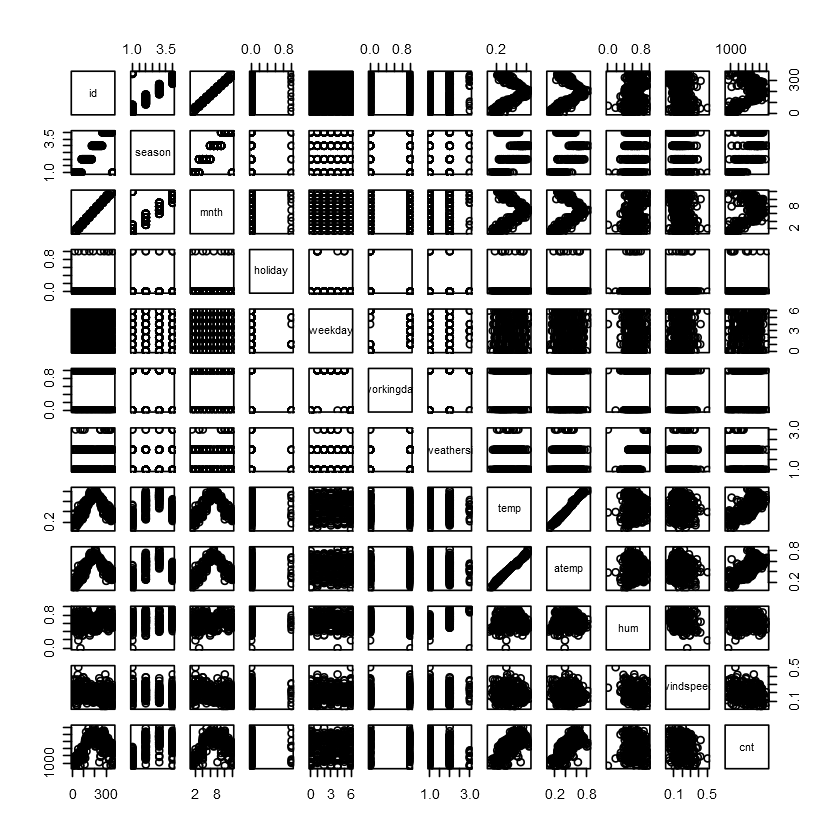

In [18]:
plot(df_train)

In [23]:
### Check if the TS is stationary
adf.test(df_train) # p-value < 0.05 indicates the TS is stationary

ERROR: Error in adf.test(df_train): x is not a vector or univariate time series


In [24]:
kpss.test(df_train)

ERROR: Error in kpss.test(df_train): x is not a vector or univariate time series


In [22]:
head(df_train)
dim(df_train)

summary(df_train)

df_train$season <- factor(df_train$season)
df_train$mnth <- factor(df_train$mnth)
df_train$holiday <- factor(df_train$holiday)
df_train$weekday <- factor(df_train$weekday)
df_train$workingday <- factor(df_train$weathersit)
df_train$weathersit <- factor(df_train$mnth)

summary(df_train)

df_train1 = subset(df_train, select = -c(id, mnth) )

tab1 <- train_test(data=df_train1,train_name="train",test_name="test",prop=0.7,seed=5,tableone=TRUE)
tab1

tab1 %>% filter(pval < 0.05)

id season mnth holiday weekday workingday weathersit temp     atemp   
1 1  1      1    0       6       2          1          0.344167 0.363625
2 2  1      1    0       0       2          1          0.363478 0.353739
3 3  1      1    0       1       1          1          0.196364 0.189405
4 4  1      1    0       2       1          1          0.200000 0.212122
5 5  1      1    0       3       1          1          0.226957 0.229270
6 6  1      1    0       4       1          1          0.204348 0.233209
  hum      windspeed cnt 
1 0.805833 0.1604460  985
2 0.696087 0.2485390  801
3 0.437273 0.2483090 1349
4 0.590435 0.1602960 1562
5 0.436957 0.1869000 1600
6 0.518261 0.0895652 1606

[1] 365  12

       id      season      mnth     holiday weekday workingday   weathersit 
 Min.   :  1   1:90   1      : 31   0:355   0:52    1:226      1      : 31  
 1st Qu.: 92   2:92   3      : 31   1: 10   1:52    2:124      3      : 31  
 Median :183   3:94   5      : 31           2:52    3: 15      5      : 31  
 Mean   :183   4:89   7      : 31           3:52               7      : 31  
 3rd Qu.:274          8      : 31           4:52               8      : 31  
 Max.   :365          10     : 31           5:52               10     : 31  
                      (Other):179           6:53               (Other):179  
      temp             atemp              hum           windspeed      
 Min.   :0.05913   Min.   :0.07907   Min.   :0.0000   Min.   :0.02239  
 1st Qu.:0.32500   1st Qu.:0.32195   1st Qu.:0.5383   1st Qu.:0.13558  
 Median :0.47917   Median :0.47285   Median :0.6475   Median :0.18690  
 Mean   :0.48666   Mean   :0.46684   Mean   :0.6437   Mean   :0.19140  
 3rd Qu.:0.65667   3rd Q

       id      season      mnth     holiday weekday   workingday    weathersit 
 Min.   :  1   1:90   1      : 31   0:355   0:52    1      : 31   1      : 31  
 1st Qu.: 92   2:92   3      : 31   1: 10   1:52    3      : 31   3      : 31  
 Median :183   3:94   5      : 31           2:52    5      : 31   5      : 31  
 Mean   :183   4:89   7      : 31           3:52    7      : 31   7      : 31  
 3rd Qu.:274          8      : 31           4:52    8      : 31   8      : 31  
 Max.   :365          10     : 31           5:52    10     : 31   10     : 31  
                      (Other):179           6:53    (Other):179   (Other):179  
      temp             atemp              hum           windspeed      
 Min.   :0.05913   Min.   :0.07907   Min.   :0.0000   Min.   :0.02239  
 1st Qu.:0.32500   1st Qu.:0.32195   1st Qu.:0.5383   1st Qu.:0.13558  
 Median :0.47917   Median :0.47285   Median :0.6475   Median :0.18690  
 Mean   :0.48666   Mean   :0.46684   Mean   :0.6437   Mean   :0.19140  


Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |================================================================      |  91%

 

You got a perfectly balanced training and test datasets

 



V1             V2           Pop                      
1  Individuals    n            365                      
2  season         1            90 (24.7%)               
3  season         2            92 (25.2%)               
4  season         3            94 (25.8%)               
5  season         4            89 (24.4%)               
6  holiday        1            10 (2.7%)                
7  weekday        0            52 (14.2%)               
8  weekday        1            52 (14.2%)               
9  weekday        2            52 (14.2%)               
10 weekday        3            52 (14.2%)               
11 weekday        4            52 (14.2%)               
12 weekday        5            52 (14.2%)               
13 weekday        6            53 (14.5%)               
14 workingday     1            31 (8.5%)                
15 workingday     2            28 (7.7%)                
16 workingday     3            31 (8.5%)                
17 workingday     4            30 (8.2%)                
18 workingday     5            31 (8.5%)                
19 workingday     6            30 (8.2%)                
20 workingday     7            31 (8.5%)                
21 workingday     8            31 (8.5%)                
22 workingday     9            30 (8.2%)                
23 workingday     10           31 (8.5%)                
24 workingday     11           30 (8.2%)                
25 workingday     12           31 (8.5%)                
26 weathersit     1            31 (8.5%)                
27 weathersit     2            28 (7.7%)                
28 weathersit     3            31 (8.5%)                
29 weathersit     4            30 (8.2%)                
30 weathersit     5            31 (8.5%)                
31 weathersit     6            30 (8.2%)                
32 weathersit     7            31 (8.5%)                
33 weathersit     8            31 (8.5%)                
34 weathersit     9            30 (8.2%)                
35 weathersit     10           31 (8.5%)                
36 weathersit     11           30 (8.2%)                
37 weathersit     12           31 (8.5%)                
38 temp           Mean (SD)    0.5 (0.2)                
39 temp           Median (IQR) 0.5 (0.3-0.7)            
40 atemp          Mean (SD)    0.5 (0.2)                
41 atemp          Median (IQR) 0.5 (0.3-0.6)            
42 hum            Mean (SD)    0.6 (0.1)                
43 hum            Median (IQR) 0.6 (0.5-0.7)            
44 windspeed      Mean (SD)    0.2 (0.1)                
45 windspeed      Median (IQR) 0.2 (0.1-0.2)            
46 cnt            Mean (SD)    3,405.8 (1,378.8)        
47 cnt            Median (IQR) 3,740.0 (2,132.0-4,586.0)
48 traintest_ind_ Mean (SD)    1.3 (0.5)                
49 traintest_ind_ Median (IQR) 1.0 (1.0-2.0)            
   1                         2                         pval 
1  255                       110                       NA   
2  62 (24.3%)                28 (25.5%)                NA   
3  67 (26.3%)                25 (22.7%)                0.914
4  65 (25.5%)                29 (26.4%)                NA   
5  61 (23.9%)                28 (25.5%)                NA   
6  5 (2.0%)                  5 (4.5%)                  0.166
7  36 (14.1%)                16 (14.5%)                NA   
8  34 (13.3%)                18 (16.4%)                0.931
9  36 (14.1%)                16 (14.5%)                NA   
10 34 (13.3%)                18 (16.4%)                NA   
11 38 (14.9%)                14 (12.7%)                NA   
12 38 (14.9%)                14 (12.7%)                NA   
13 39 (15.3%)                14 (12.7%)                NA   
14 20 (7.8%)                 11 (10.0%)                NA   
15 18 (7.1%)                 10 (9.1%)                 0.841
16 24 (9.4%)                 7 (6.4%)                  NA   
17 20 (7.8%)                 10 (9.1%)                 NA   
18 23 (9.0%)                 8 (7.3%)                  

ERROR: Error in filter(., pval < 0.05): object 'pval' not found


### Differencing
 
In this dataset we see there is a trend and a seasonality. We will try to differentiate it for both to convert to stationary

In [27]:
# Seasonal Differencing
nsdiffs(data)  # number for seasonal differencing needed

[1] 1

In [30]:
seasdiff <- diff(data, lag=frequency(AirPassengers), differences=1)  # seasonal differencing

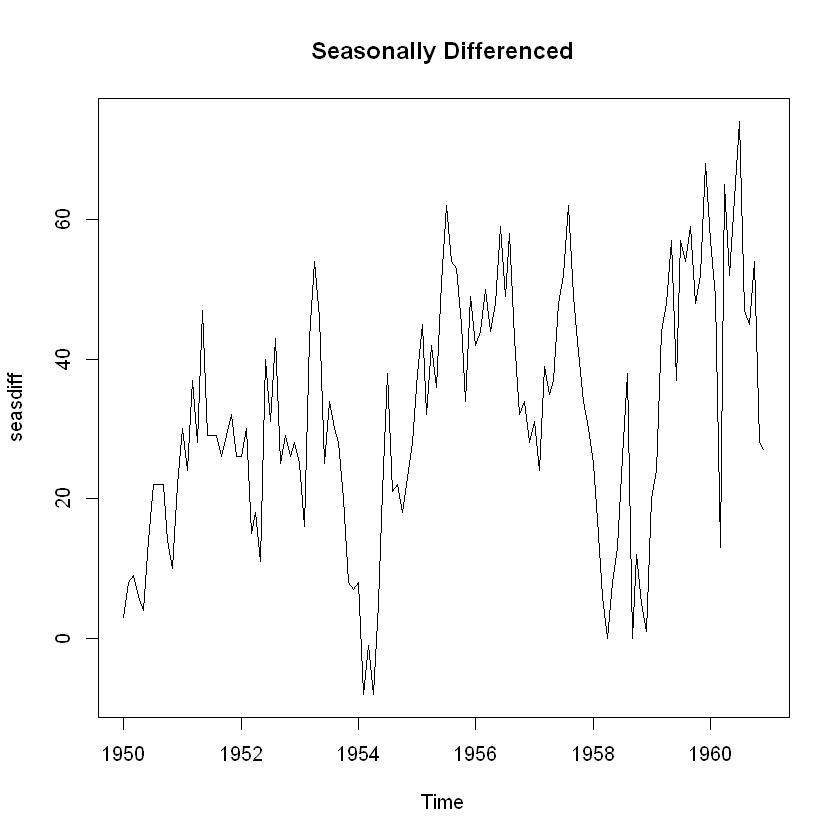

In [31]:
plot(seasdiff, type="l", main="Seasonally Differenced")  # still not stationary!

In [93]:
## checking if the residuals show autocorrelation or are white noise
Box.test(seasdiff,1)


	Box-Pierce test

data:  seasdiff
X-squared = 28.557, df = 1, p-value = 9.098e-08


In [32]:
## Trying to detrend it to make stationary
ndiffs(seasdiff)  # number of differences need to make it stationary

[1] 1

In [33]:
stationaryTS <- diff(seasdiff, differences= 1)

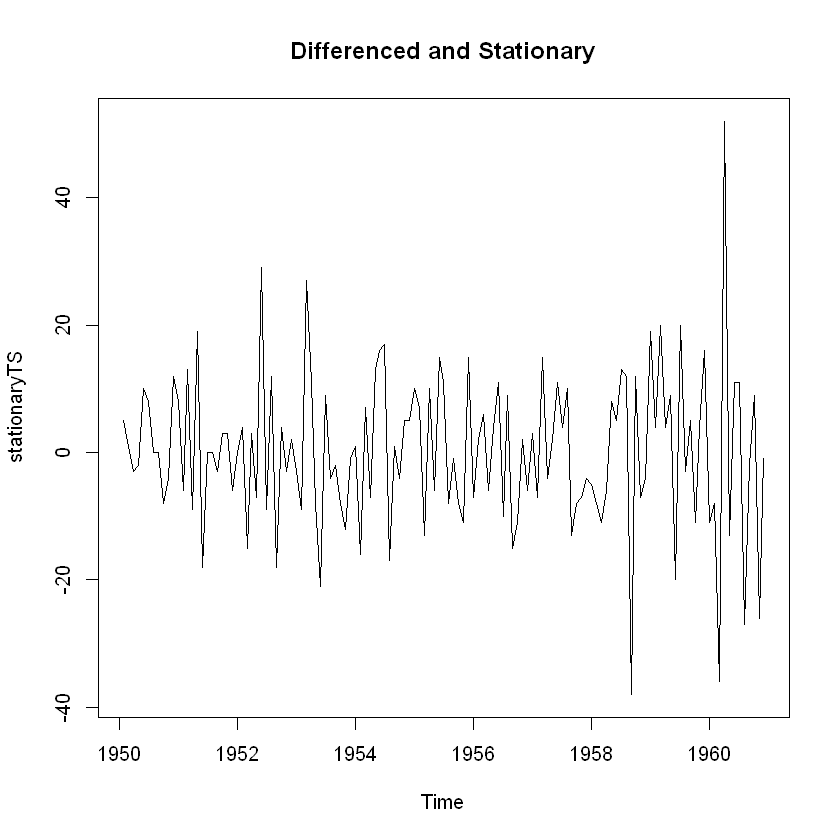

In [34]:
plot(stationaryTS, type="l", main="Differenced and Stationary")  # appears to be stationary

In [38]:
## checking if the residuals show autocorrelation or are white noise
Box.test(stationaryTS,1)


	Box-Pierce test

data:  stationaryTS
X-squared = 12.574, df = 1, p-value = 0.0003911


In [97]:
### Check if the TS is stationary
adf.test(stationaryTS) # p-value < 0.05 indicates the TS is stationary

Warning message in adf.test(stationaryTS):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  stationaryTS
Dickey-Fuller = -4.9631, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


The p-value is significant, so we assume stationarity 

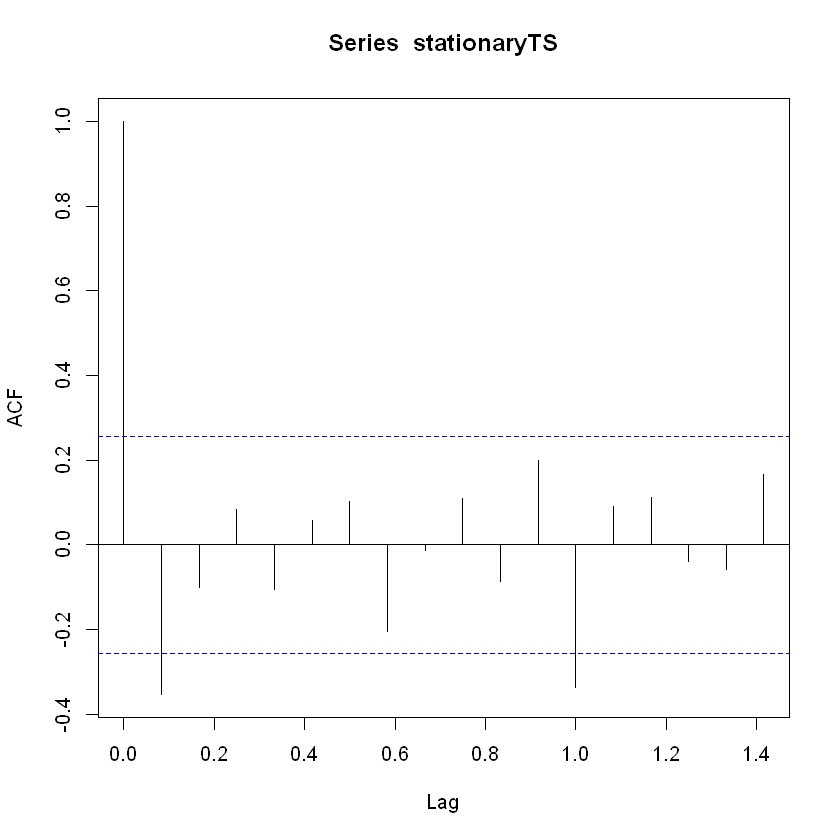

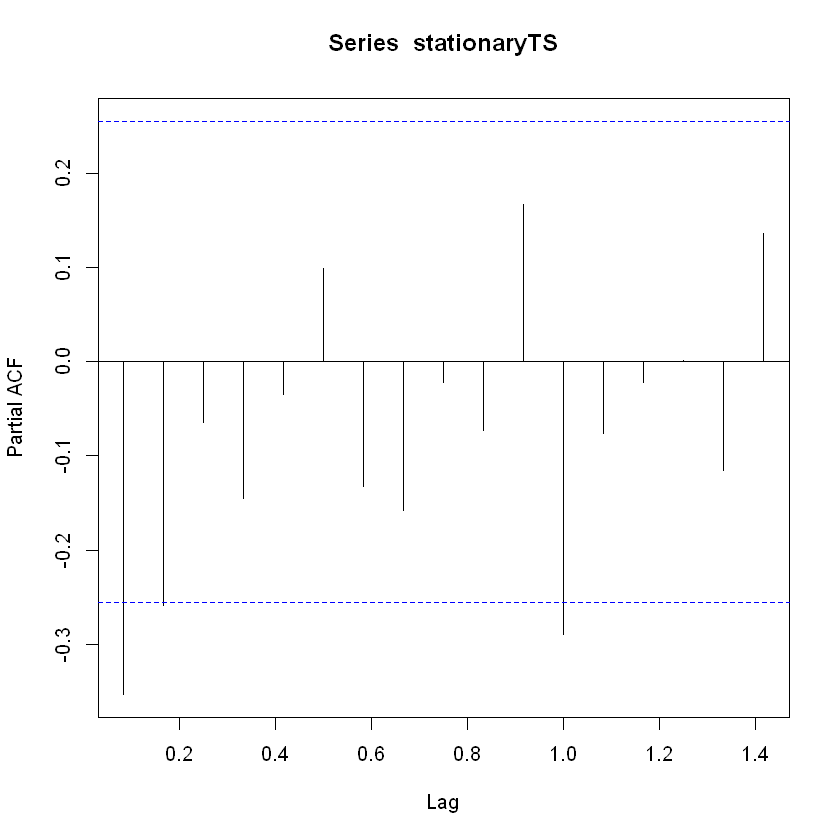

In [96]:
acf(stationaryTS)
pacf(stationaryTS)

### Decomposition

In [28]:
ddec <- decompose(ts(df_train$cnt,frequency = 7))

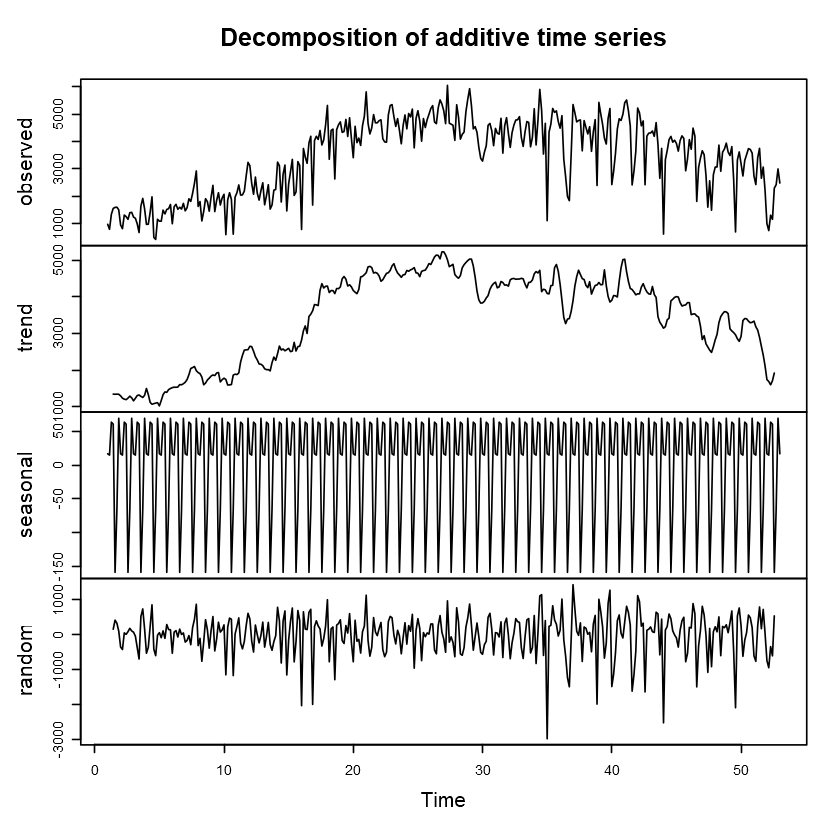

In [29]:
plot(ddec)

In [30]:
str(ddec)

List of 6
 $ x       : Time-Series [1:365] from 1 to 53: 985 801 1349 1562 1600 1606 1510 959 822 1321 ...
 $ seasonal: Time-Series [1:365] from 1 to 53: 16.7 14.7 63.4 60.4 -158.5 ...
 $ trend   : Time-Series [1:365] from 1 to 53: NA NA NA 1345 1341 ...
 $ random  : Time-Series [1:365] from 1 to 53: NA NA NA 157 418 ...
 $ figure  : num [1:7] 16.7 14.7 63.4 60.4 -158.5 ...
 $ type    : chr "additive"
 - attr(*, "class")= chr "decomposed.ts"


In [31]:
df_train$cycle <- ddec$seasonal

In [106]:
## we have to check if the random is white noise
Box.test(ddec$random)


	Box-Pierce test

data:  ddec$random
X-squared = 56.5, df = 1, p-value = 5.618e-14


The remaining (random) data after decomposition preserves autocorrelation. Thus, the trend and seasonal has not all the autocorrelation needed for a good model.

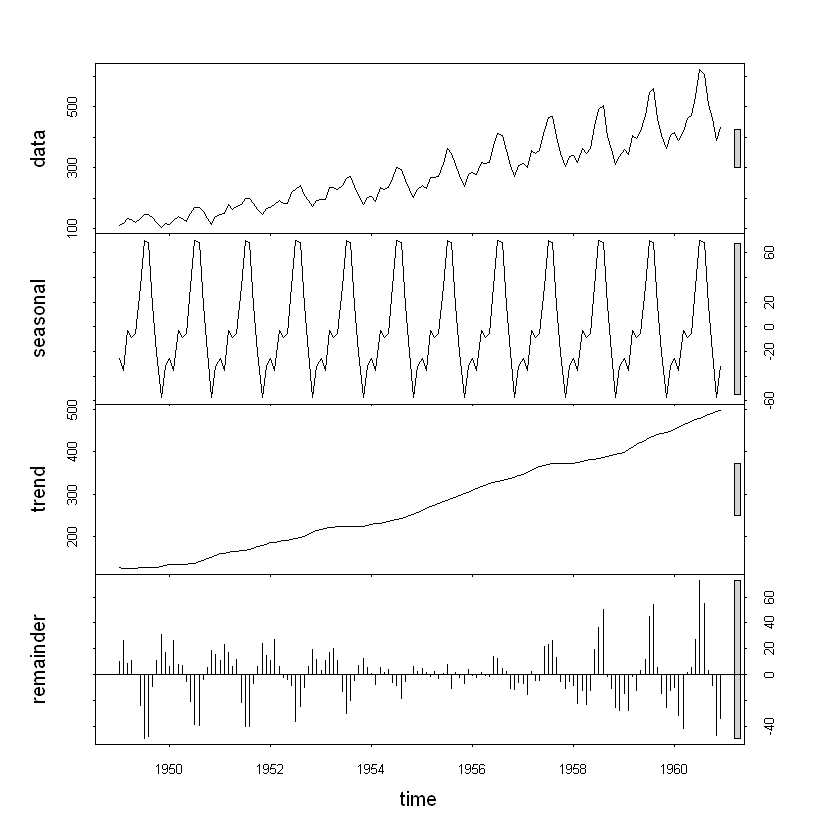

In [105]:
data.stl <- stl(data,s.window="periodic")
#head(data.stl)
plot(data.stl)

In [107]:
### this is what will be used to run the arima models...
data.adj <- seasadj(data.stl)


In [108]:
Box.test(data.adj)


	Box-Pierce test

data:  data.adj
X-squared = 136.66, df = 1, p-value < 2.2e-16


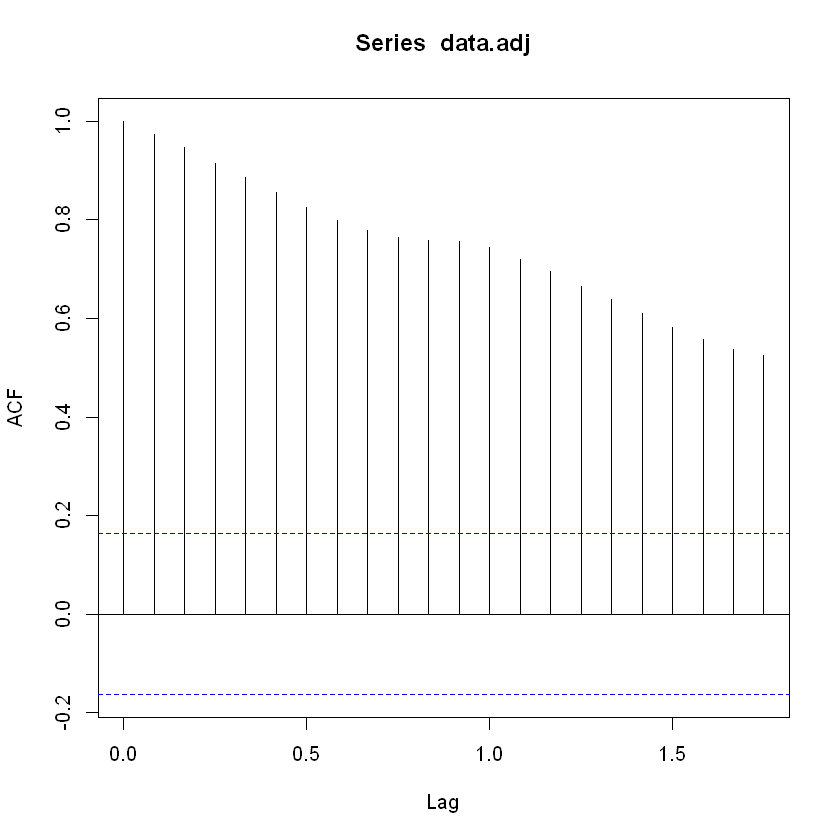

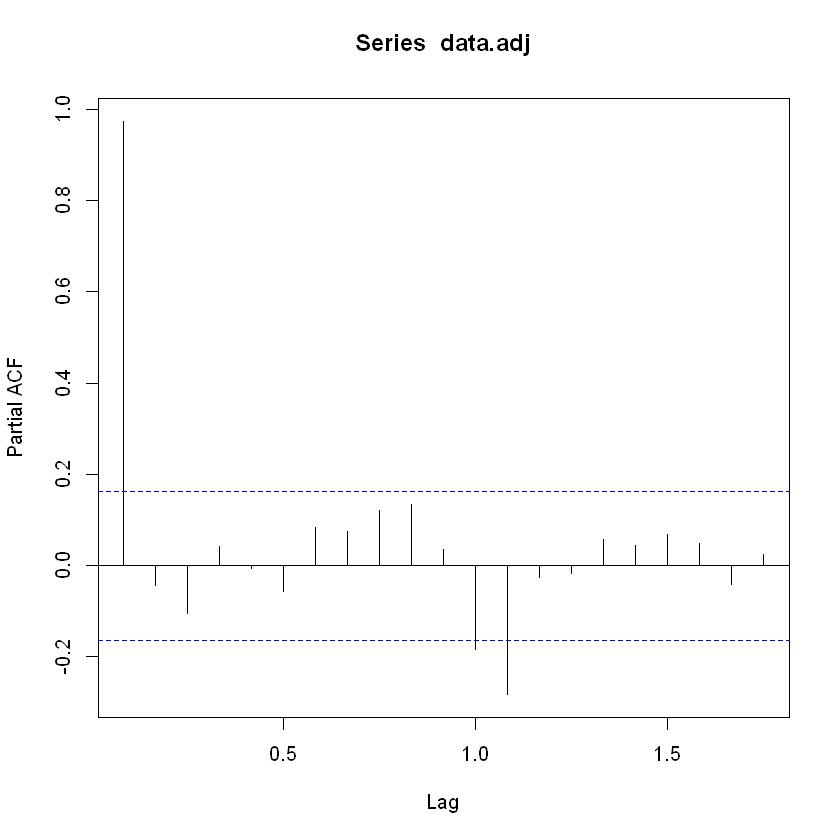

In [109]:
acf(data.adj)
pacf(data.adj)

Which type of model is the most addequate for this data ?

In [138]:
ar(data.adj, order.max = 1, demean = F, intercept = T)


Call:
ar(x = data.adj, order.max = 1, demean = F, intercept = T)

Coefficients:
     1  
0.9895  

Order selected 1  sigma^2 estimated as  1929

In [139]:
mod <- arima(data.adj,order = c(1,0,0))
summary(mod)


Call:
arima(x = data.adj, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.9926   293.1983
s.e.  0.0081   113.1085

sigma^2 estimated as 289.2:  log likelihood = -614.46,  aic = 1234.92

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE     MASE      ACF1
Training set 2.029697 17.00492 12.87199 0.2185883 5.559789 1.002336 0.1781362


### Forecasting

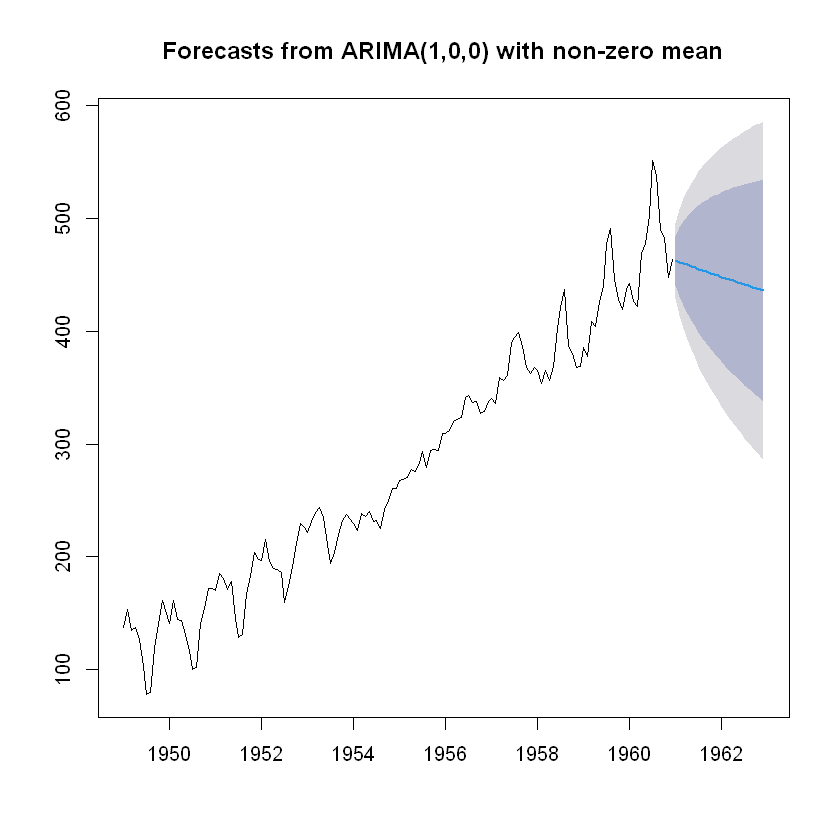

In [140]:
yt <- forecast(mod)
plot(yt)

In [141]:
mod.auto <- auto.arima(data.adj)
summary(mod)


Call:
arima(x = data.adj, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.9926   293.1983
s.e.  0.0081   113.1085

sigma^2 estimated as 289.2:  log likelihood = -614.46,  aic = 1234.92

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE     MASE      ACF1
Training set 2.029697 17.00492 12.87199 0.2185883 5.559789 1.002336 0.1781362


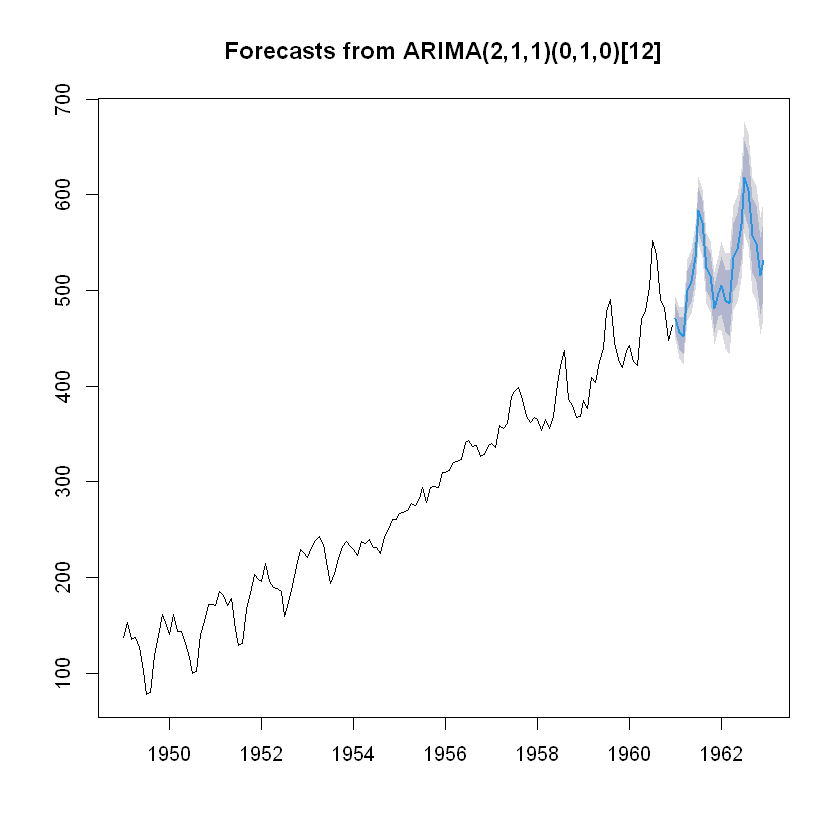

In [142]:
yt.auto <- forecast(mod.auto)
plot(yt.auto)

## Example 2

In [54]:
data2 <- datasets::USAccDeaths

In [55]:
class(data2)

[1] "ts"

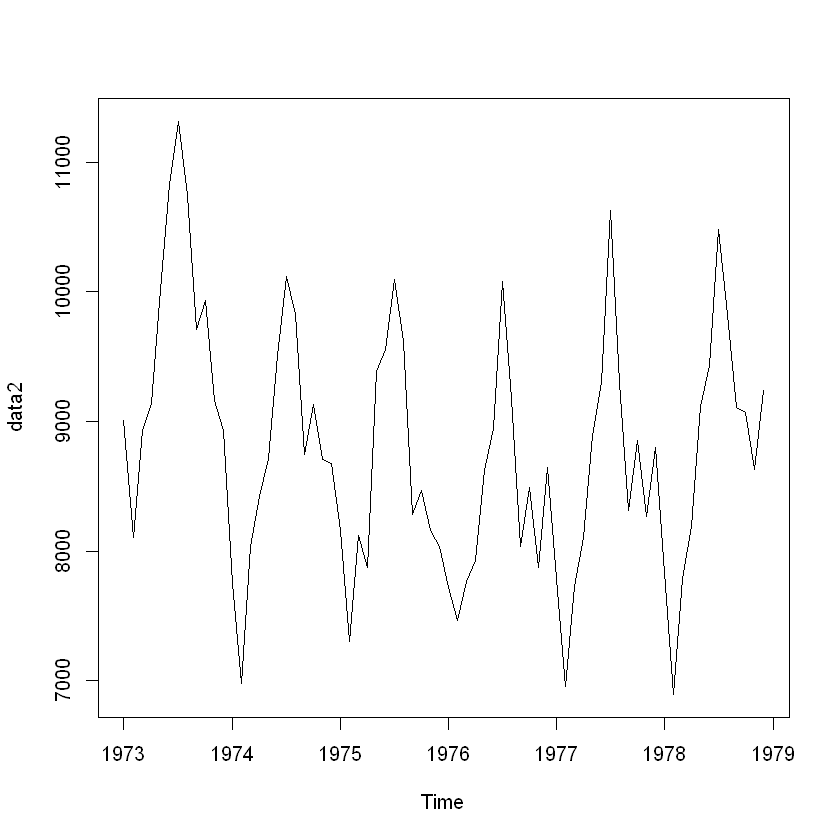

In [56]:
plot(data2)

In [57]:
### Check if the TS is stationary
adf.test(data2) 


	Augmented Dickey-Fuller Test

data:  data2
Dickey-Fuller = -3.8221, Lag order = 4, p-value = 0.02268
alternative hypothesis: stationary


 p-value < 0.05 indicates the TS is stationary

In [58]:
kpss.test(data2)

Warning message in kpss.test(data2):
"p-value greater than printed p-value"



	KPSS Test for Level Stationarity

data:  data2
KPSS Level = 0.19799, Truncation lag parameter = 3, p-value = 0.1


### Differencing

In [66]:
# Seasonal Differencing
nsdiffs(data2)  # number for seasonal differencing needed

[1] 1

In [71]:
seasdiff <- diff(data2, lag=frequency(AirPassengers), differences=1)  # seasonal differencing

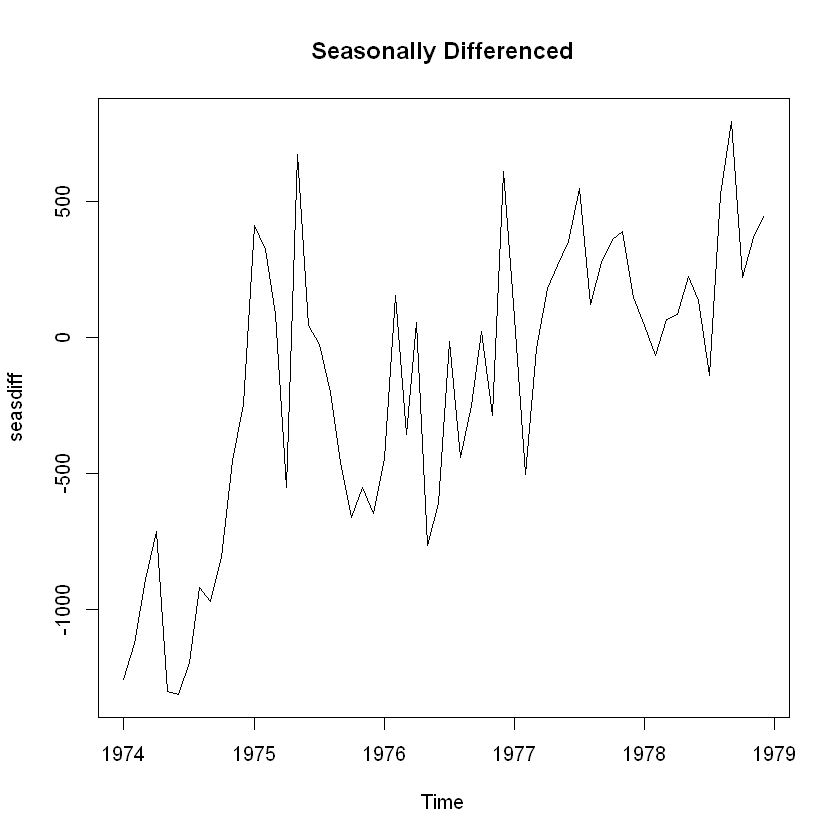

In [72]:
stationaryTS <- diff(seasdiff, differences= 1)
plot(seasdiff, type="l", main="Seasonally Differenced")  # still not stationary!

In [73]:
## Trying to detrend it to make stationary
ndiffs(seasdiff)  # number of differences need to make it stationary

[1] 1

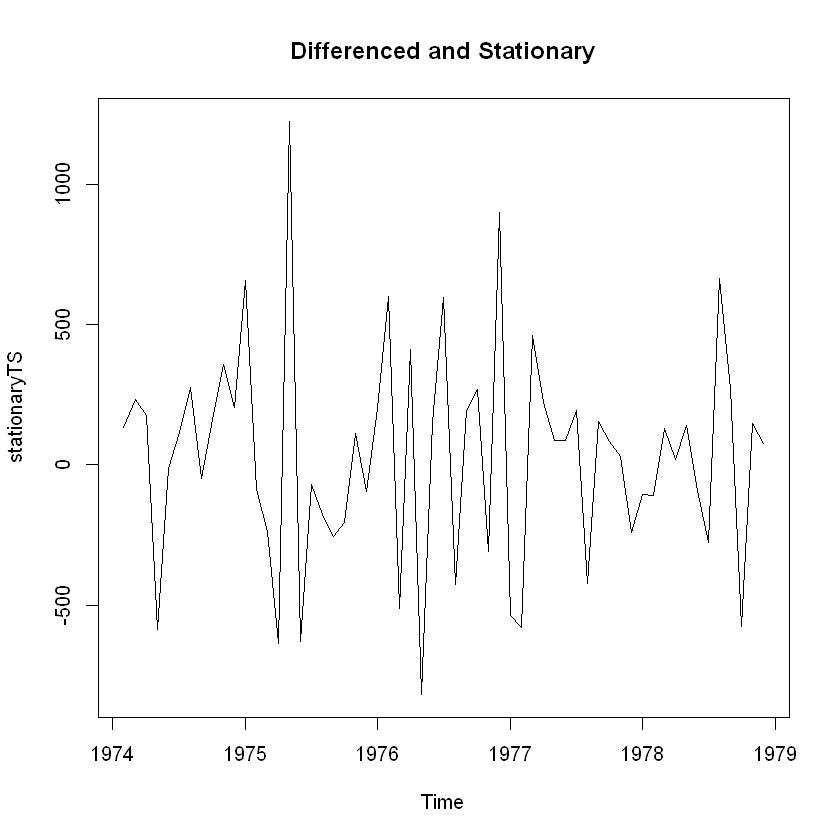

In [74]:
stationaryTS <- diff(seasdiff, differences= 1)
plot(stationaryTS, type="l", main="Differenced and Stationary")  # appears to be stationary

In [75]:
## checking if in the residuals remains autocorrelation
Box.test(stationaryTS,1)


	Box-Pierce test

data:  stationaryTS
X-squared = 7.3674, df = 1, p-value = 0.006642


### Decomposition

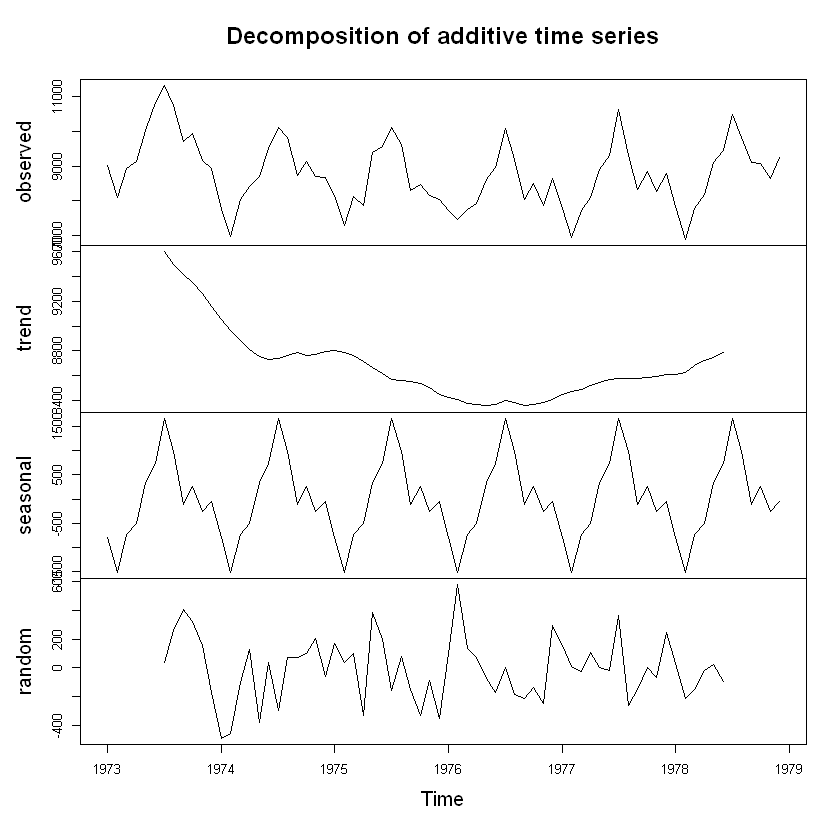

In [59]:
ddec2 <- decompose(data2)
plot(ddec2)

In [119]:
data.stl2 <- stl(data2,s.window="periodic")

In [120]:
data.adj2 <- seasadj(data.stl2)

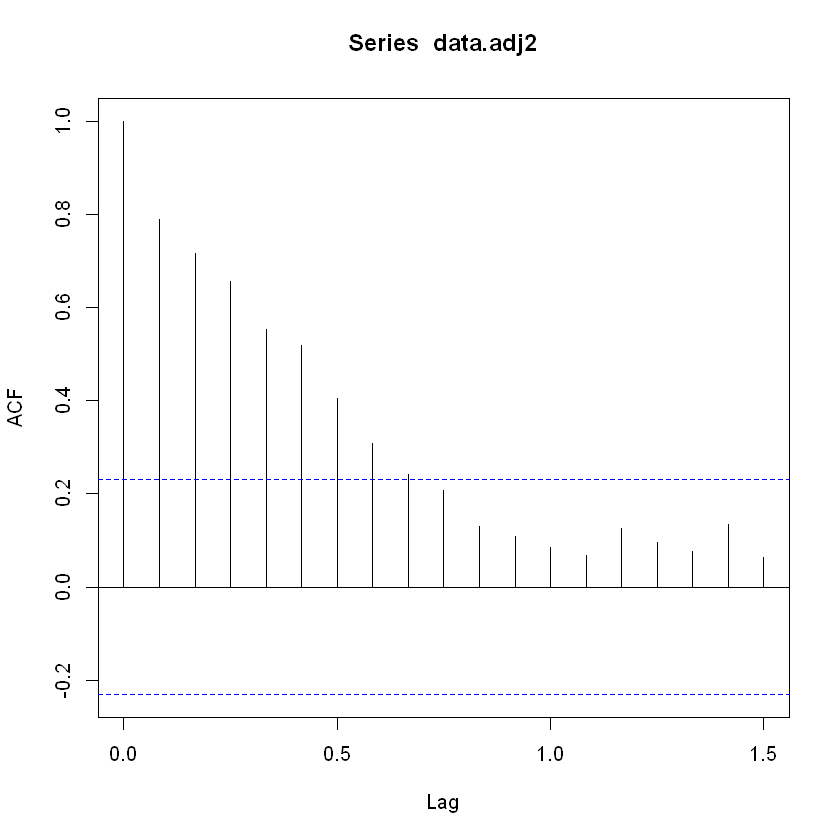

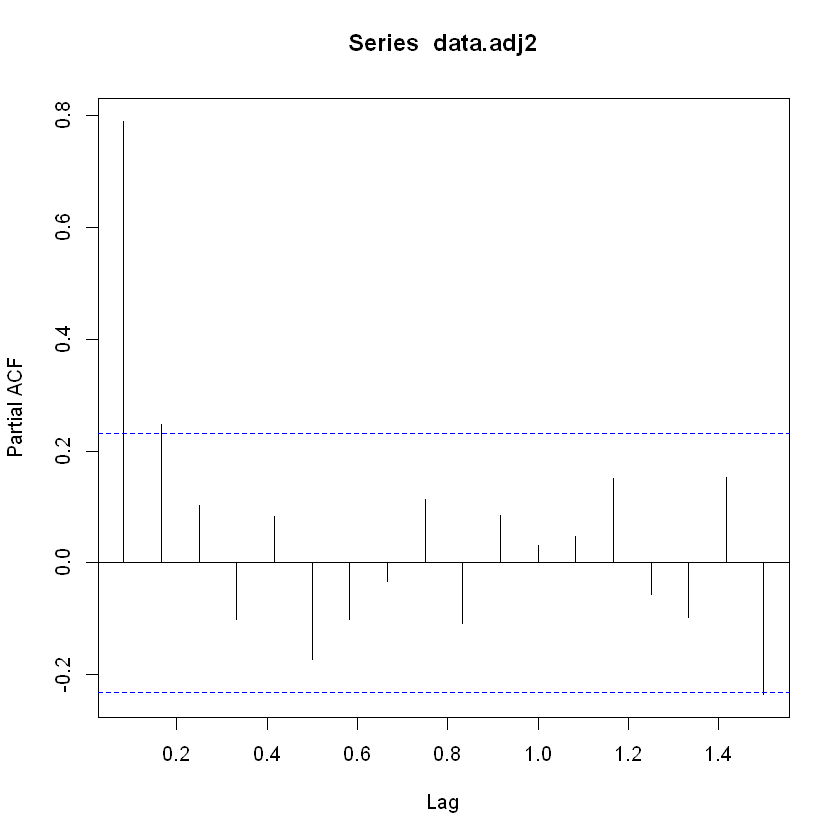

In [121]:
acf(data.adj2)
pacf(data.adj2)

In [131]:
mod2 <- arima(data.adj2,order = c(1,0,0))
summary(mod2)


Call:
arima(x = data.adj2, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.8463  8889.2299
s.e.  0.0660   194.9542

sigma^2 estimated as 70671:  log likelihood = -504.76,  aic = 1015.52

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -17.08019 265.8398 220.3662 -0.278637 2.519334 0.9926211
                   ACF1
Training set -0.2770471


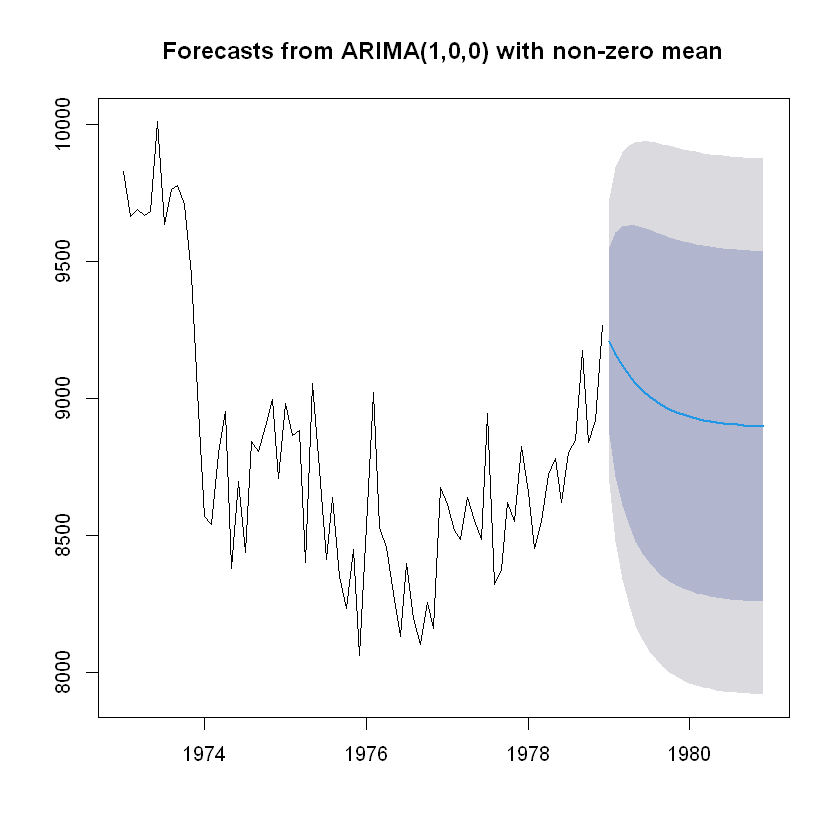

In [136]:
yt2 <- forecast(mod2)
plot(yt2)

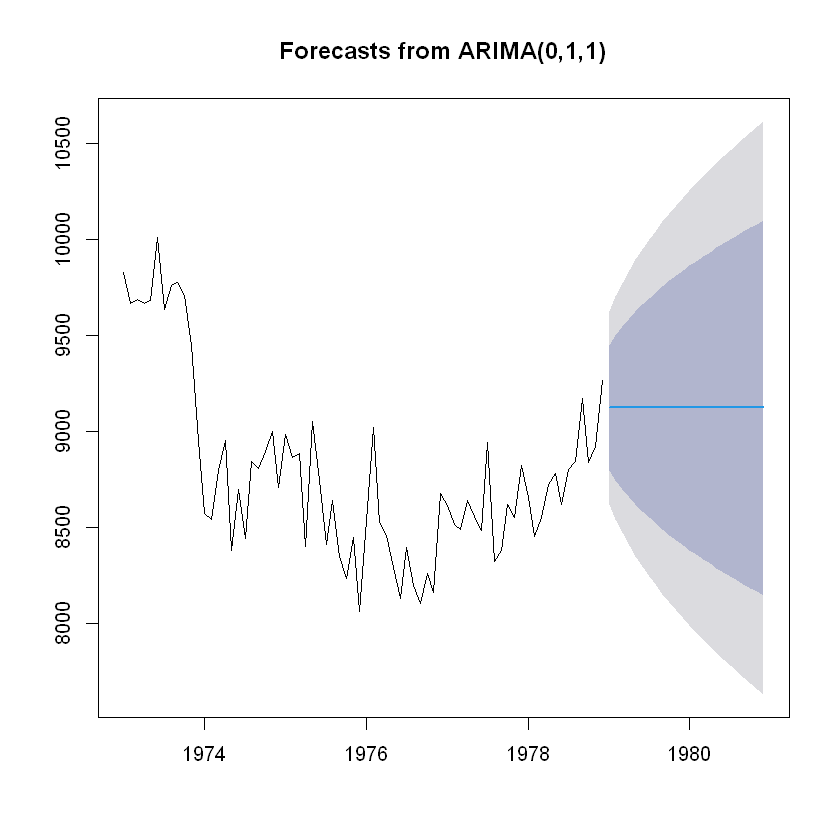

In [137]:
mod2.auto <- auto.arima(data.adj2)
yt2.auto <- forecast(mod2.auto)
plot(yt2.auto)

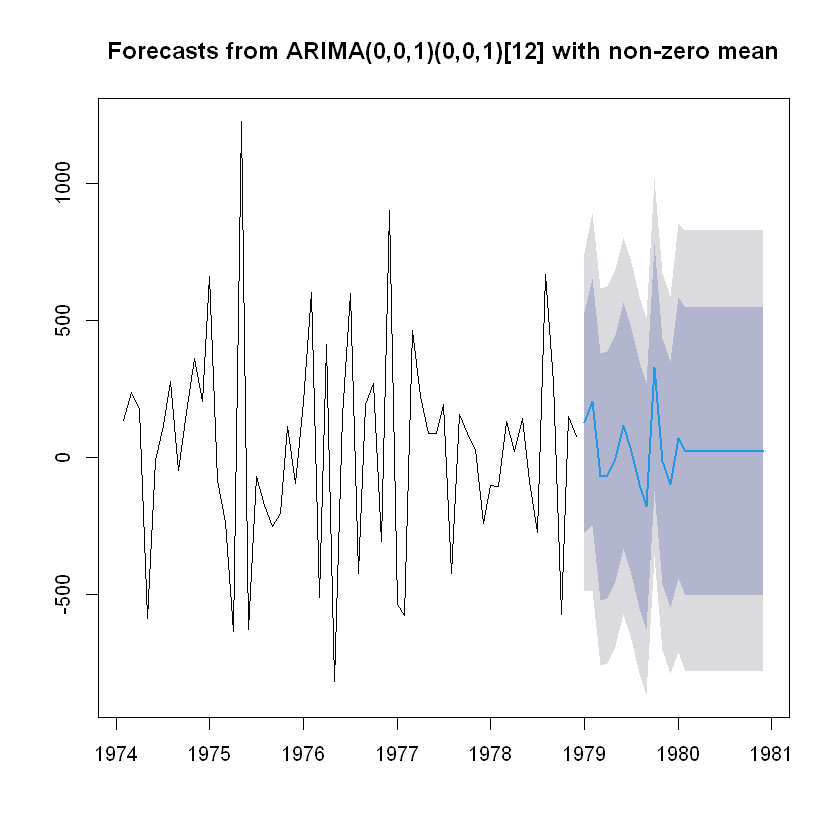

In [143]:
# run the models using the differencing results...
mod2a.auto <- auto.arima(stationaryTS)
yt2a.auto <- forecast(mod2a.auto)
plot(yt2a.auto)

## Example 3 -  Multivariable

In [3]:
data <- airquality

In [4]:
head(data)

Ozone Solar.R Wind Temp Month Day
1 41    190      7.4 67   5     1  
2 36    118      8.0 72   5     2  
3 12    149     12.6 74   5     3  
4 18    313     11.5 62   5     4  
5 NA     NA     14.3 56   5     5  
6 28     NA     14.9 66   5     6

In [5]:
summary(data)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

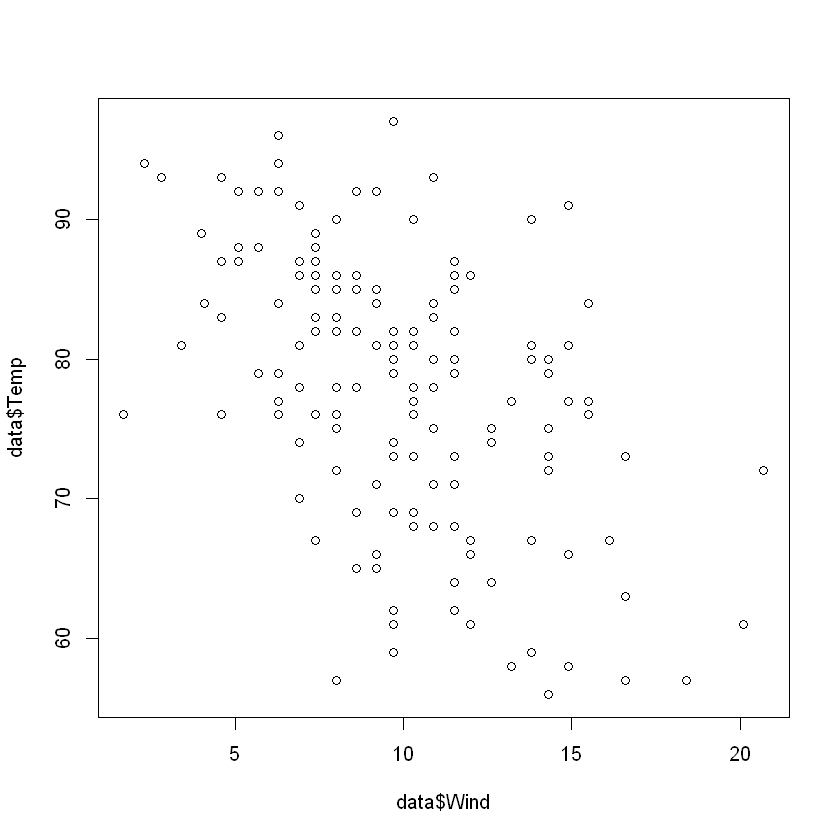

In [10]:
plot(data$Temp ~ data$Wind)

In [8]:
## we will take temperature and wind for our analyses
temp <- ts(data$Temp,start=c(5,1), end=c(9,30),frequency=7)
wind <- ts(data$Wind,start=c(5,1), end=c(9,30),frequency=7)


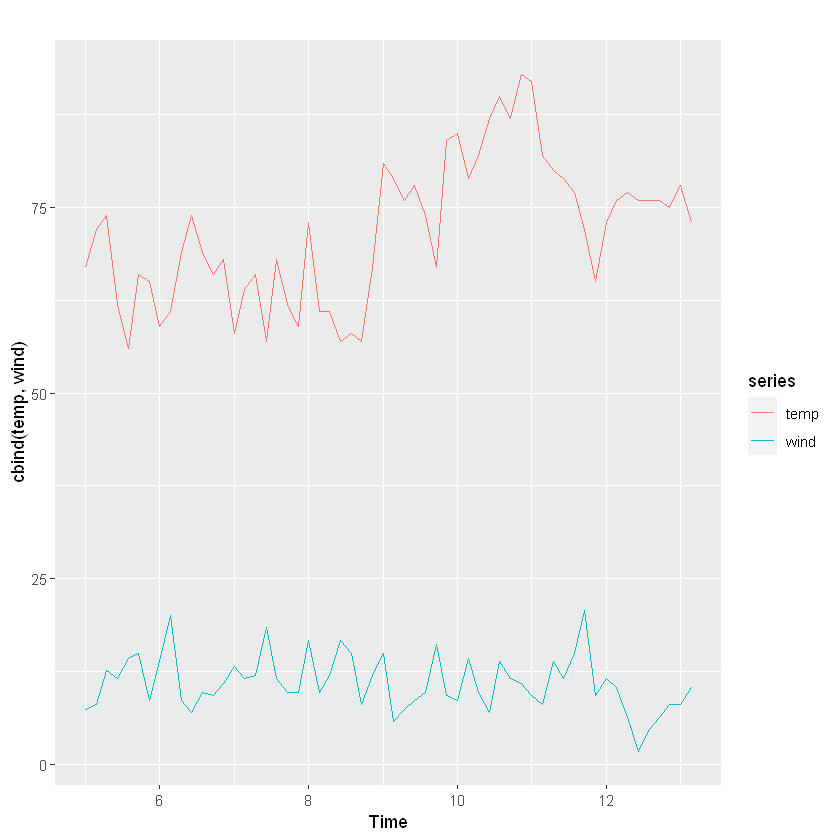

In [11]:
autoplot(cbind(temp,wind))

### Decomposition

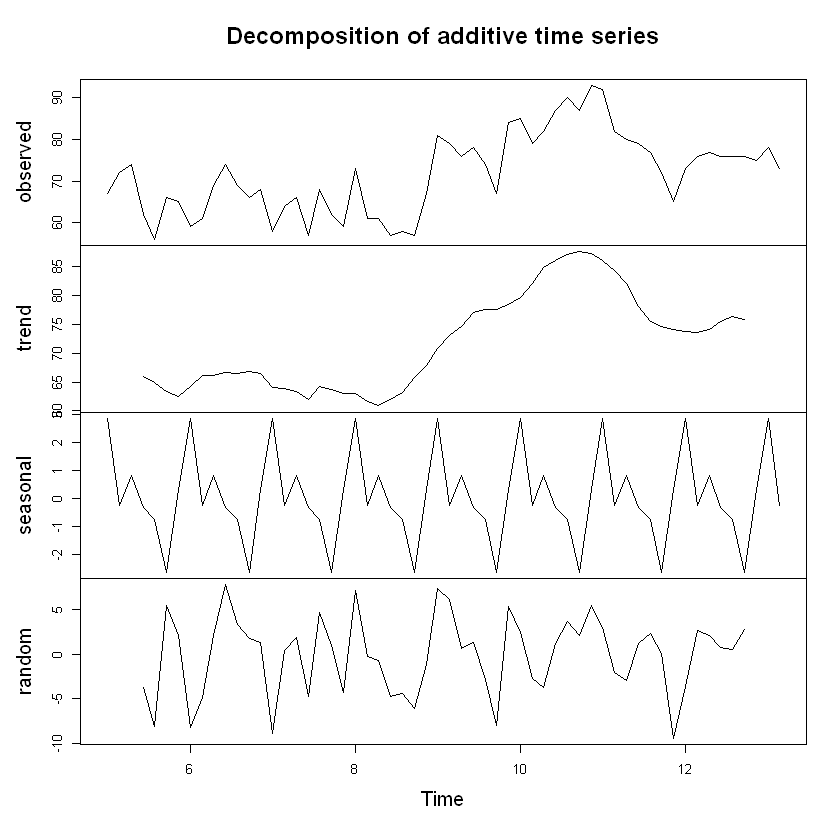

In [76]:
dec_t <- decompose(temp)
plot(dec_t)

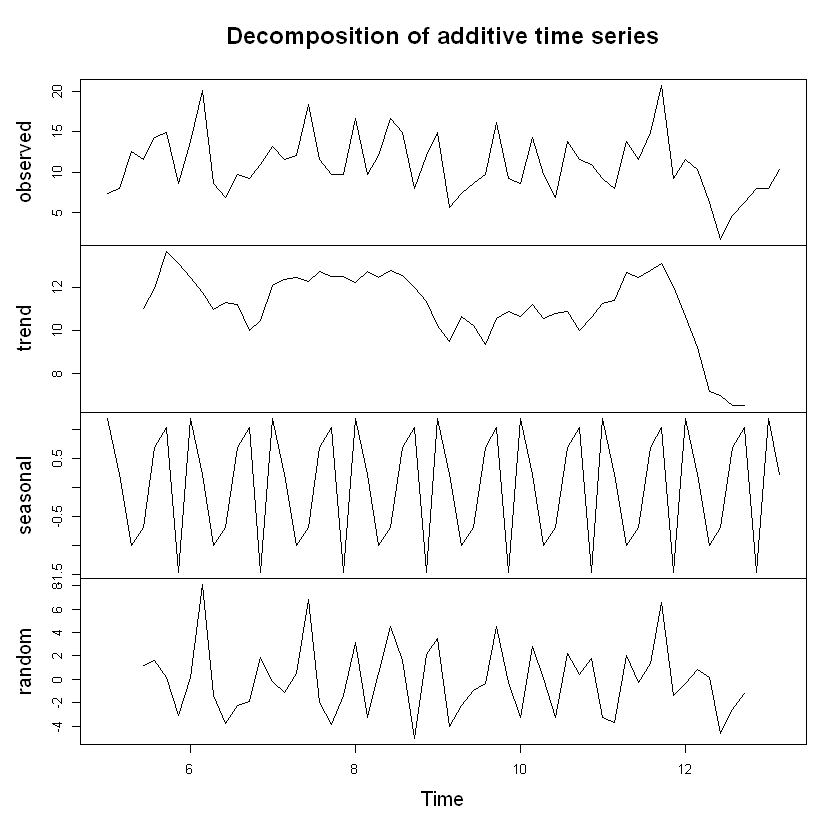

In [77]:
dec_w <- decompose(wind)
plot(dec_w)

In [12]:
mod <- lm(temp ~ wind)
summary(mod)


Call:
lm(formula = temp ~ wind)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.1491  -7.5598  -0.7729   7.1633  21.1663 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  80.5364     3.7847  21.279   <2e-16 ***
wind         -0.7984     0.3281  -2.433   0.0182 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.219 on 56 degrees of freedom
Multiple R-squared:  0.09563,	Adjusted R-squared:  0.07948 
F-statistic: 5.922 on 1 and 56 DF,  p-value: 0.01817


### Autocorrelation

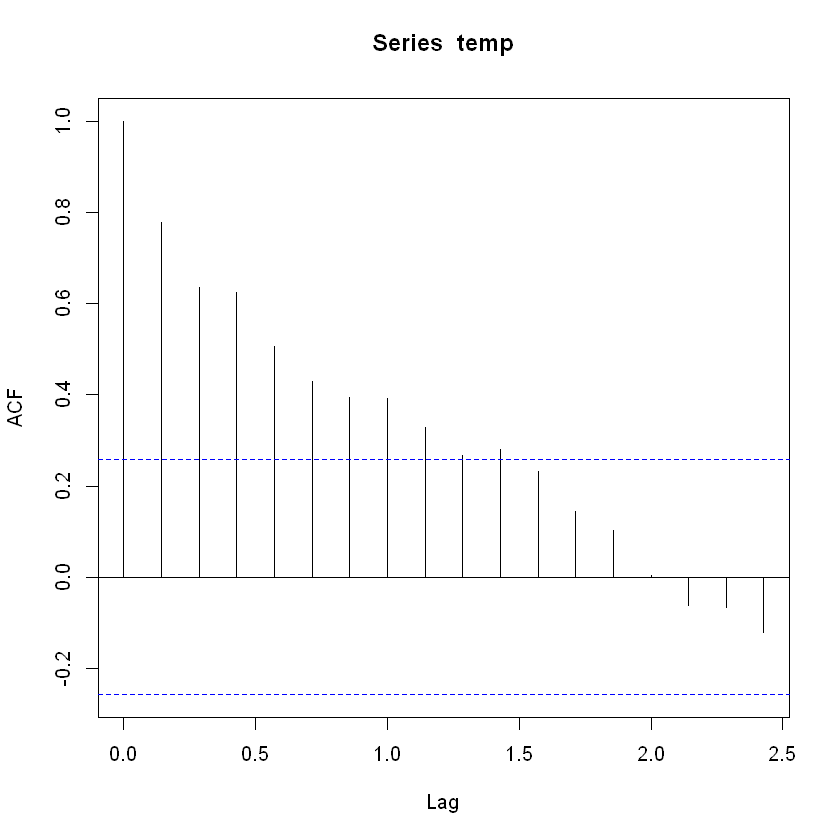

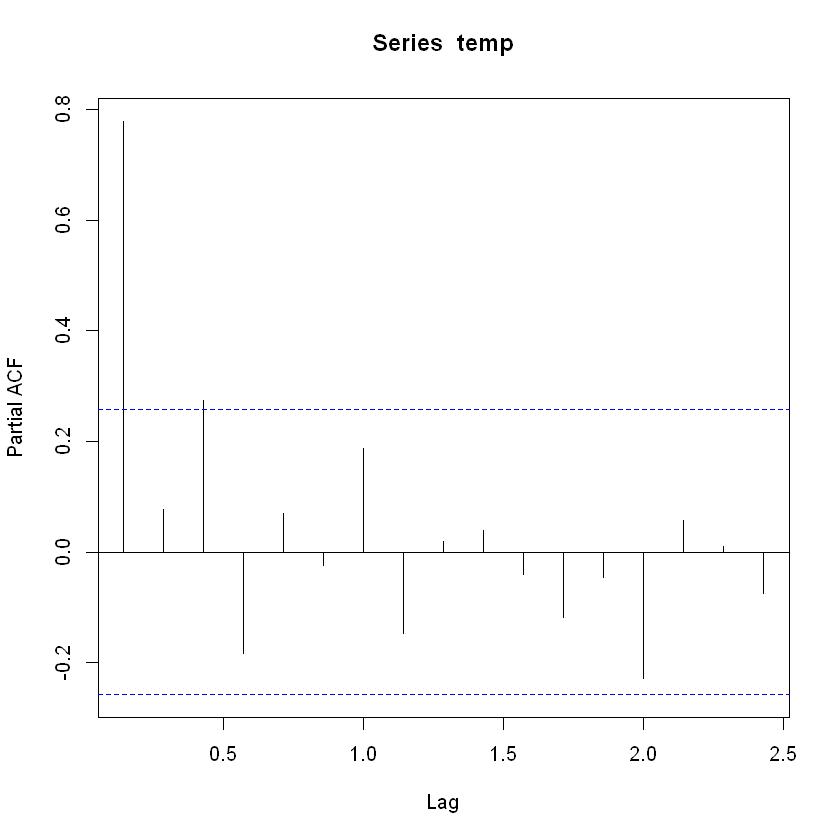

In [20]:
acf(temp)
pacf(temp)

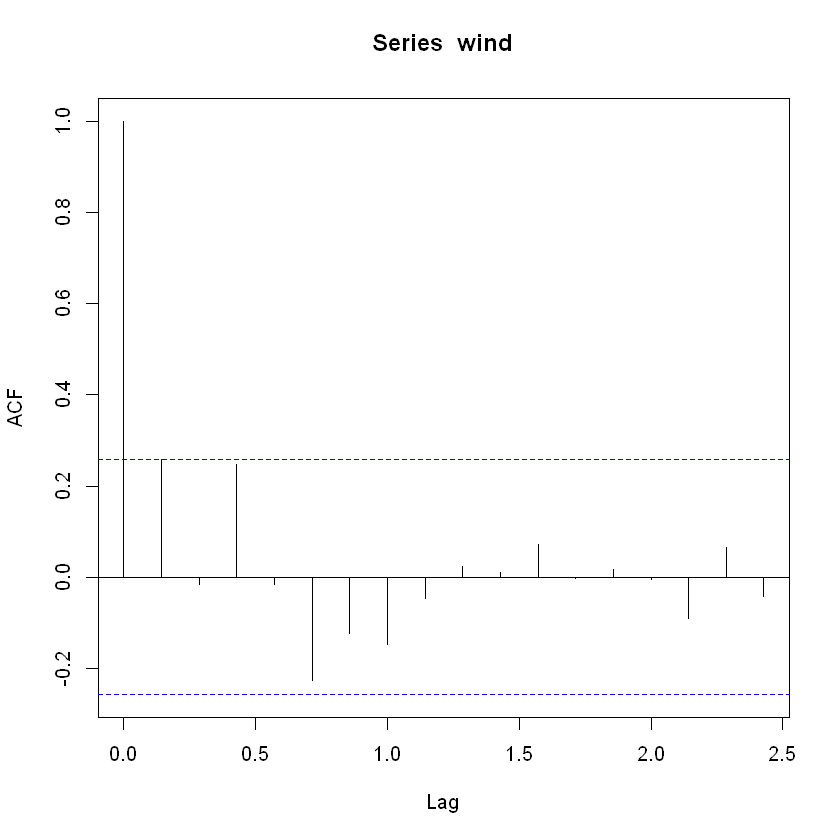

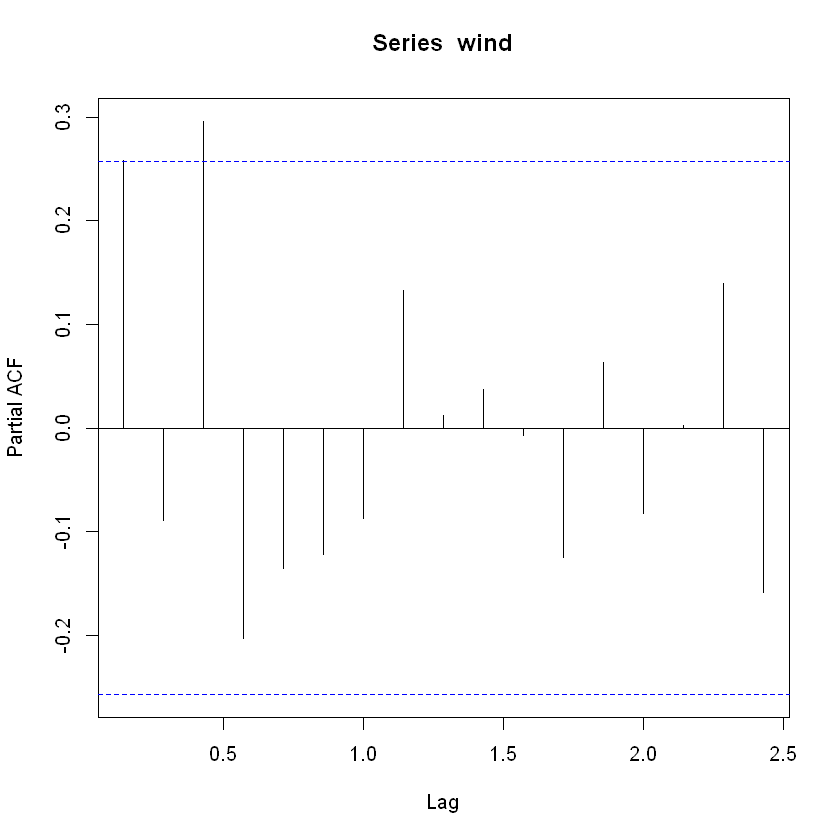

In [21]:
acf(wind)
pacf(wind)

### Vector Autoregression (VAR)

In [80]:
library(vars)

In [145]:
### obtain the best lag to be used
lagselect <- VARselect(cbind(temp,wind), lag.max = 15, type = "const")
lagselect$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
    14      1      1      1

The AIC reccomends a lag of 14 while the other metrics reccomend a lag of 1. We will begin with the lag 1 model.

In [154]:
var.1 <- VAR(cbind(temp,wind), 2, type = "const") # Estimate the model

In [155]:
summary(var.1)


VAR Estimation Results:
Endogenous variables: temp, wind 
Deterministic variables: const 
Sample size: 56 
Log Likelihood: -326.762 
Roots of the characteristic polynomial:
0.8177 0.3564 0.3564 0.1655
Call:
VAR(y = cbind(temp, wind), p = 2, type = "const")


Estimation results for equation temp: 
temp = temp.l1 + wind.l1 + temp.l2 + wind.l2 + const 

        Estimate Std. Error t value Pr(>|t|)    
temp.l1  0.72297    0.14104   5.126 4.61e-06 ***
wind.l1 -0.02451    0.24329  -0.101    0.920    
temp.l2  0.08150    0.14191   0.574    0.568    
wind.l2  0.07527    0.24054   0.313    0.756    
const   13.52962    9.12627   1.482    0.144    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 6.292 on 51 degrees of freedom
Multiple R-Squared: 0.6146,	Adjusted R-squared: 0.5844 
F-statistic: 20.33 on 4 and 51 DF,  p-value: 4.594e-10 


Estimation results for equation wind: 
wind = temp.l1 + wind.l1 + temp.l2 + wind.l2 + const 

        Estimate St

In [157]:
serial.test(var.1,lags.pt=10, type="PT.asymptotic")


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.1
Chi-squared = 34.391, df = 32, p-value = 0.354

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.1
Chi-squared = 34.391, df = 32, p-value = 0.354



The serial test shows no residual autocorrelation. Thus, we proceed to predict the model.

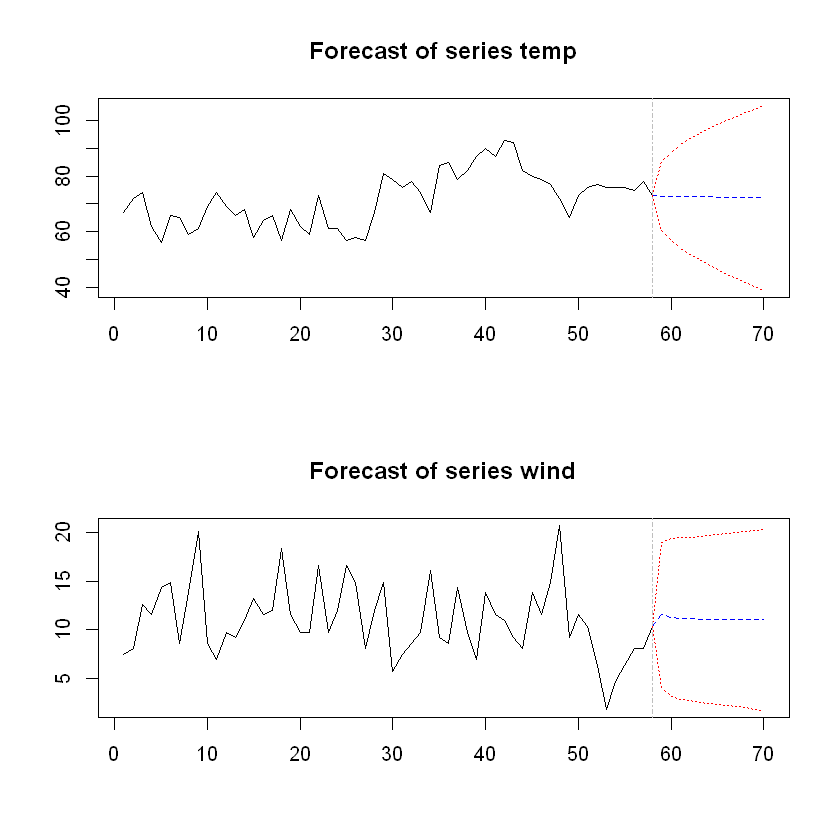

In [153]:
var1.forecast <- predict(var.1, n.ahead = 12, ci = 0.95)
plot(var1.forecast)

## Stock Exchange analysis

In [158]:
### stock exchange analysis with var
library(quantmod)

Warning message:
"package 'quantmod' was built under R version 4.0.2"
Loading required package: xts

Warning message:
"package 'xts' was built under R version 4.0.2"
Loading required package: TTR

Warning message:
"package 'TTR' was built under R version 4.0.2"
Version 0.4-0 included new data defaults. See ?getSymbols.



In [168]:
getSymbols(c("SPY","AAPL","NFLX"),
           from = "2018/12/31",
           to = "2020/06/30",
           periodicity = "daily")

[1] "SPY"  "AAPL" "NFLX"

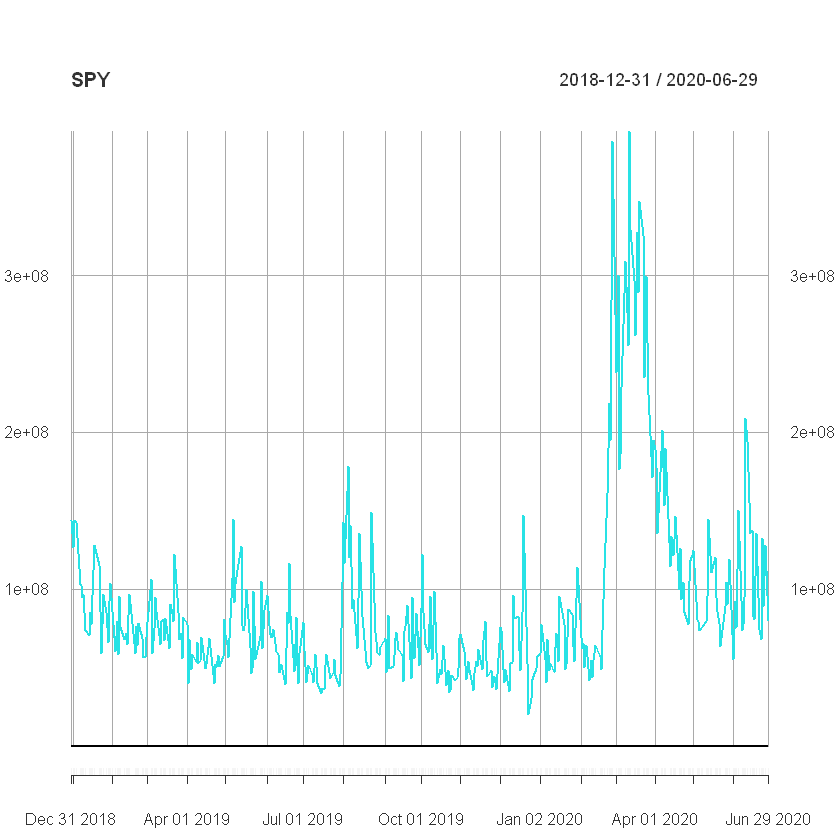

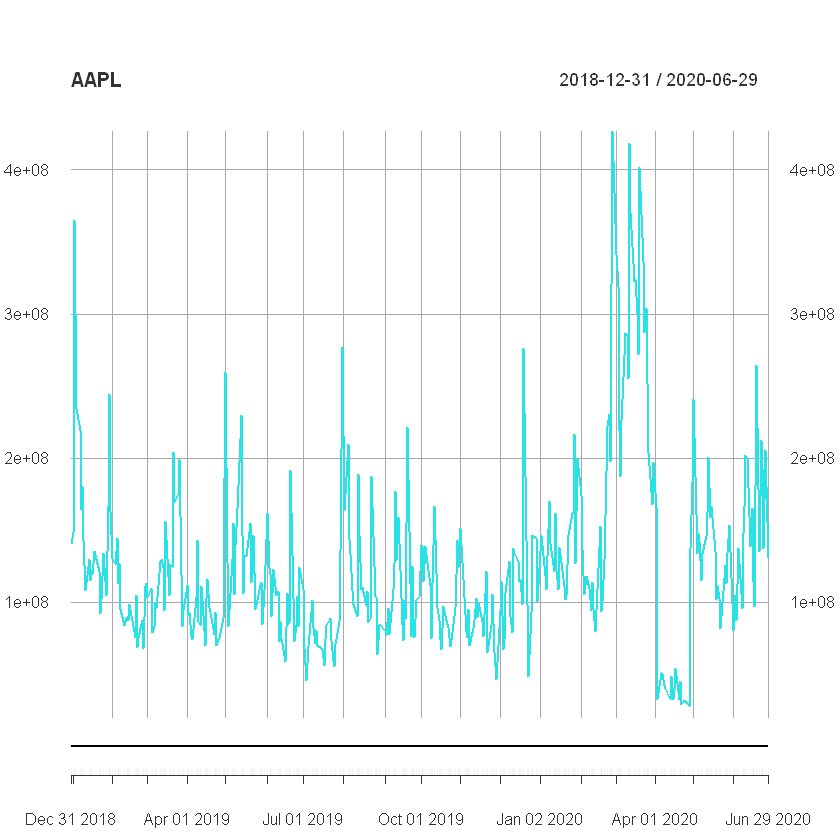

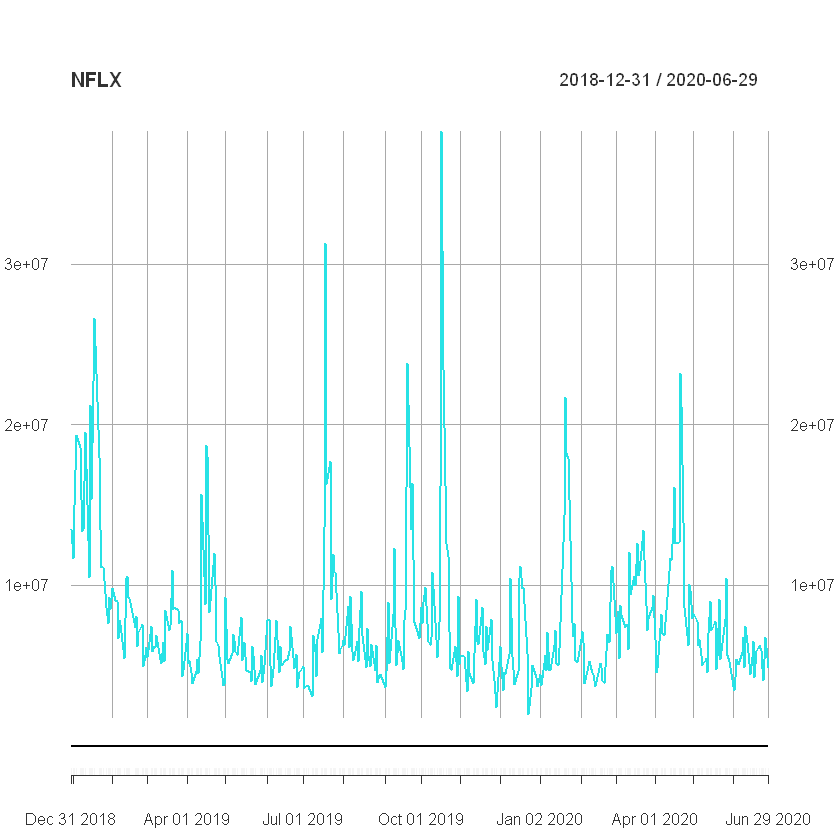

In [169]:
plot(SPY)
plot(AAPL)
plot(NFLX)

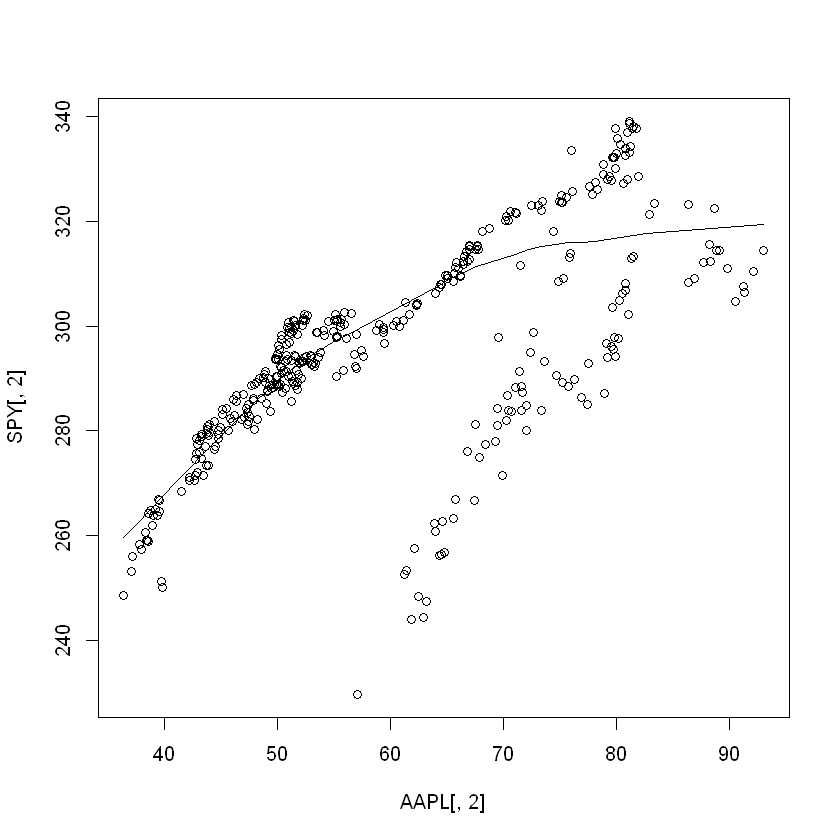

In [175]:
scatter.smooth(SPY[,2] ~ AAPL[,2])

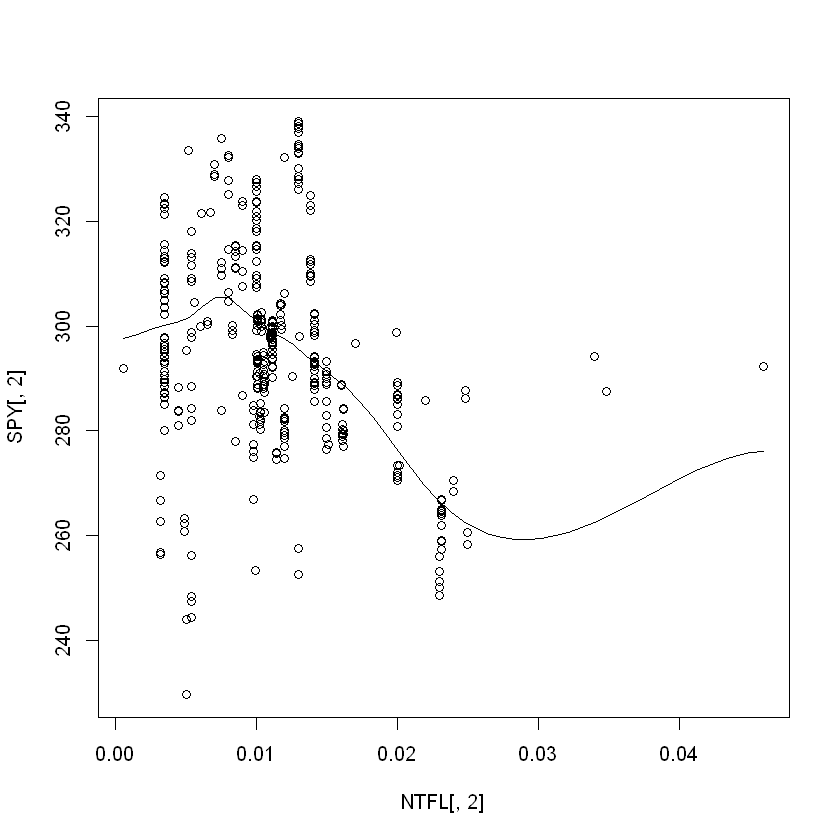

In [176]:
scatter.smooth(SPY[,2] ~ NTFL[,2])

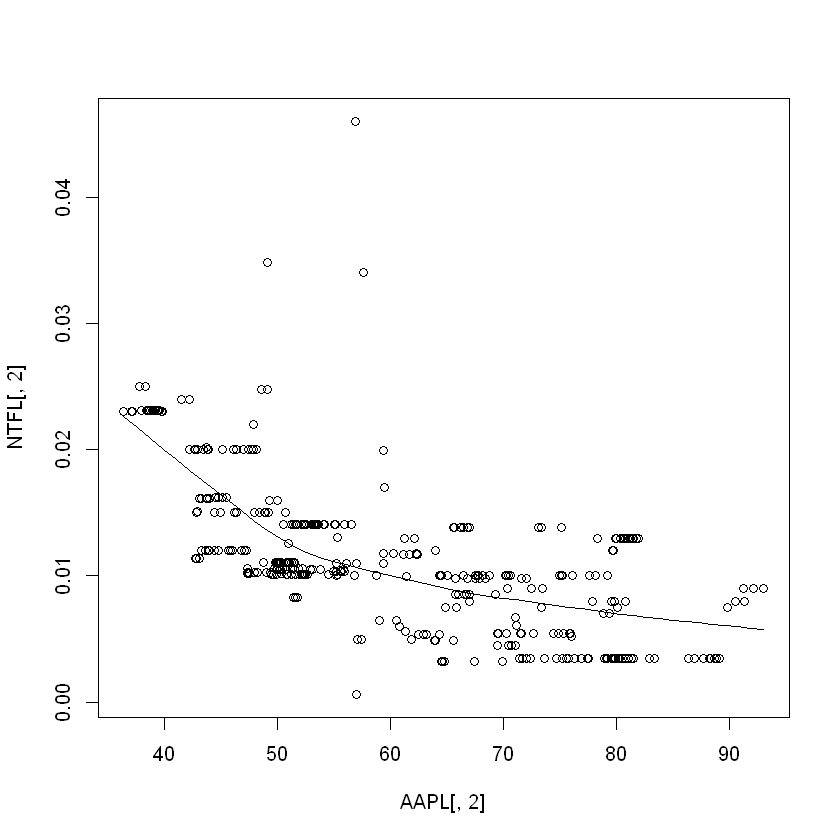

In [177]:
scatter.smooth(NTFL[,2] ~ AAPL[,2])

In [185]:
### we will take only the CLose part of each data
head(SPY)
spy <- SPY$SPY.Close
head(spy)

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2018-12-31   249.56   250.19  247.47    249.92  144299400     241.8054
2019-01-02   245.98   251.21  245.95    250.18  126925200     242.0569
2019-01-03   248.23   248.57  243.67    244.21  144140700     236.2807
2019-01-04   247.59   253.11  247.17    252.39  142628800     244.1952
2019-01-07   252.69   255.95  251.69    254.38  103139100     246.1206
2019-01-08   256.82   257.31  254.00    256.77  102512600     248.4330

           SPY.Close
2018-12-31    249.92
2019-01-02    250.18
2019-01-03    244.21
2019-01-04    252.39
2019-01-07    254.38
2019-01-08    256.77

In [186]:
apple <- AAPL$AAPL.Close
head(apple)
netflix <- NTFL$NTFL.Close
head(netflix)


           AAPL.Close
2018-12-31    39.4350
2019-01-02    39.4800
2019-01-03    35.5475
2019-01-04    37.0650
2019-01-07    36.9825
2019-01-08    37.6875

           NTFL.Close
2018-12-31     0.0151
2019-01-02     0.0230
2019-01-03     0.0230
2019-01-04     0.0230
2019-01-07     0.0230
2019-01-08     0.0231

In [187]:
lagselect <- VARselect(cbind(spy,apple,netflix), lag.max = 15, type = "const")
lagselect$selection


AIC(n)  HQ(n)  SC(n) FPE(n) 
     3      2      1      3

In [195]:
var.bursa <- VAR(cbind(spy,apple,netflix), 3, type = "const") # Estimate the model
serial.test(var.bursa,lags.pt=20, type="PT.asymptotic")



	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 218.01, df = 153, p-value = 0.0004373

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 218.01, df = 153, p-value = 0.0004373



We found residual autocorrelation with the recommended lag 3. We will try with lag 2

In [196]:
var.bursa <- VAR(cbind(spy,apple,netflix), 2, type = "const") # Estimate the model
serial.test(var.bursa,lags.pt=20, type="PT.asymptotic")



	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 240.67, df = 162, p-value = 5.912e-05

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 240.67, df = 162, p-value = 5.912e-05



In [197]:
var.bursa <- VAR(cbind(spy,apple,netflix), 4, type = "const") # Estimate the model
serial.test(var.bursa,lags.pt=20, type="PT.asymptotic")



	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 204.81, df = 144, p-value = 0.0006555

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 204.81, df = 144, p-value = 0.0006555



In [198]:
var.bursa <- VAR(cbind(spy,apple,netflix), 5, type = "const") # Estimate the model
serial.test(var.bursa,lags.pt=20, type="PT.asymptotic")



	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 191.06, df = 135, p-value = 0.001078

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 191.06, df = 135, p-value = 0.001078



In [199]:
var.bursa <- VAR(cbind(spy,apple,netflix), 6, type = "const") # Estimate the model
serial.test(var.bursa,lags.pt=20, type="PT.asymptotic")



	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 180.91, df = 126, p-value = 0.0009812

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 180.91, df = 126, p-value = 0.0009812



In [200]:
var.bursa <- VAR(cbind(spy,apple,netflix), 7, type = "const") # Estimate the model
serial.test(var.bursa,lags.pt=20, type="PT.asymptotic")



	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 170.32, df = 117, p-value = 0.0009482

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 170.32, df = 117, p-value = 0.0009482



In [201]:
var.bursa <- VAR(cbind(spy,apple,netflix), 8, type = "const") # Estimate the model
serial.test(var.bursa,lags.pt=20, type="PT.asymptotic")



	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 140.08, df = 108, p-value = 0.02058

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 140.08, df = 108, p-value = 0.02058



In [202]:
var.bursa <- VAR(cbind(spy,apple,netflix), 9, type = "const") # Estimate the model
serial.test(var.bursa,lags.pt=20, type="PT.asymptotic")



	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 123.94, df = 99, p-value = 0.04561

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 123.94, df = 99, p-value = 0.04561



In [203]:
var.bursa <- VAR(cbind(spy,apple,netflix), 10, type = "const") # Estimate the model
serial.test(var.bursa,lags.pt=20, type="PT.asymptotic")



	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 111.5, df = 90, p-value = 0.06188

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.bursa
Chi-squared = 111.5, df = 90, p-value = 0.06188



lag 10 give us the best result, as there is no residual autocorrelation!

In [205]:
summary(var.bursa)


VAR Estimation Results:
Endogenous variables: SPY.Close, AAPL.Close, NTFL.Close 
Deterministic variables: const 
Sample size: 367 
Log Likelihood: 294.498 
Roots of the characteristic polynomial:
1.003 0.9436 0.9436 0.9284 0.9284 0.9165 0.8732 0.8732 0.8715 0.8715 0.8219 0.8219 0.8099 0.8099 0.8022 0.8022 0.7854 0.7854 0.7777 0.7777 0.773 0.773 0.7668 0.7324 0.6356 0.6356 0.6299 0.6299 0.5679 0.1276
Call:
VAR(y = cbind(spy, apple, netflix), p = 10, type = "const")


Estimation results for equation SPY.Close: 
SPY.Close = SPY.Close.l1 + AAPL.Close.l1 + NTFL.Close.l1 + SPY.Close.l2 + AAPL.Close.l2 + NTFL.Close.l2 + SPY.Close.l3 + AAPL.Close.l3 + NTFL.Close.l3 + SPY.Close.l4 + AAPL.Close.l4 + NTFL.Close.l4 + SPY.Close.l5 + AAPL.Close.l5 + NTFL.Close.l5 + SPY.Close.l6 + AAPL.Close.l6 + NTFL.Close.l6 + SPY.Close.l7 + AAPL.Close.l7 + NTFL.Close.l7 + SPY.Close.l8 + AAPL.Close.l8 + NTFL.Close.l8 + SPY.Close.l9 + AAPL.Close.l9 + NTFL.Close.l9 + SPY.Close.l10 + AAPL.Close.l10 + NTFL.Close.l10 +

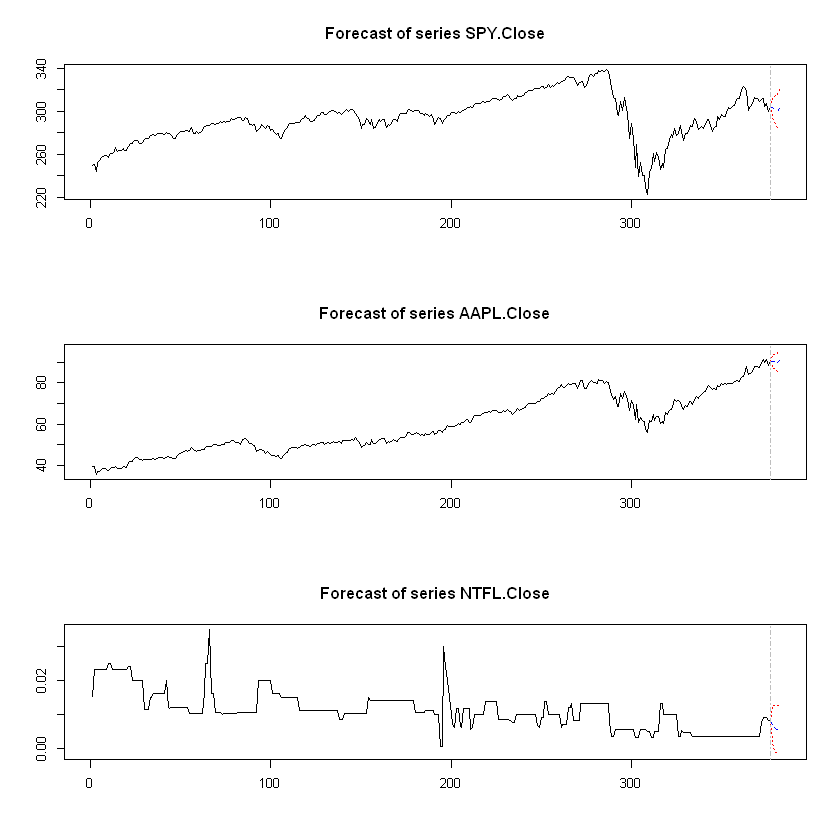

In [206]:
varbursa.forecast <- predict(var.bursa, n.ahead = 5, ci = 0.95)
plot(varbursa.forecast)